In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from tools import *
import geopandas as gpd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import os
plt.style.use('ggplot')
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',None)
with warnings.catch_warnings():
	warnings.simplefilter("ignore")

# 1 Global Analysis 
## 1. Creation of a global dataframe

In [62]:
df_full = generate_global_df()
display(df_full.shape)
display(df_full.head(2))


(155019, 91)

Name      City      Country     Region  \
0  AC Hotel by Marriott San Juan Condado  San Juan  Puerto Rico  Caribbean   
1  AC Hotel by Marriott San Juan Condado  San Juan  Puerto Rico  Caribbean   

  Continent           Location  Score  NbReviews  Distance from center  Stars  \
0   America  Condado, San Juan    8.2     1398.0                   5.3      4   
1   America  Condado, San Juan    8.2     1398.0                   5.3      4   

                                            Url link  Staff_rating  \
0  https://www.booking.com/hotel/pr/ac-hotel-marr...           8.7   
1  https://www.booking.com/hotel/pr/ac-hotel-marr...           8.7   

   Facilities_rating  Cleanliness_rating  Comfort_rating  \
0                8.5                 8.7             8.7   
1                8.5                 8.7             8.7   

   Value_for_money_rating  Location_rating                         Room Type  \
0                     7.8              8.9  King Executive Room with Balcony   
1                     7.8              8.9  King Executive Room with Balcony   

   Guests nb  Price  Breakfast  Cancellation  Region Number  Continent Number  \
0        2.0  342.0       23.0           1.0             29                19   
1        2.0  379.0        0.0           1.0             29                19   

   Price per Square Meter to Buy Apartment Outside of Centre  \
0                                                NaN           
1                                                NaN           

   Price per Square Meter to Buy Apartment in City Centre  \
0                                                NaN        
1                                                NaN        

   International Primary School, Yearly for 1 Child  \
0                                           10508.4   
1                                           10508.4   

   Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child  \
0                                             442.32                     
1                                             442.32                     

   1 Pair of Jeans (Levis 501 Or Similar)  \
0                                   44.57   
1                                   44.57   

   1 Pair of Men Leather Business Shoes  \
0                                101.06   
1                                101.06   

   1 Pair of Nike Running Shoes (Mid-Range)  \
0                                     80.81   
1                                     80.81   

   1 Summer Dress in a Chain Store (Zara, H&M, ...)  Apples (1kg)  \
0                                             42.22          5.28   
1                                             42.22          5.28   

   Banana (1kg)  Beef Round (1kg) (or Equivalent Back Leg Red Meat)  \
0          2.26                                              12.57    
1          2.26                                              12.57    

   Bottle of Wine (Mid-Range)  Chicken Fillets (1kg)  \
0                       16.89                   8.19   
1                       16.89                   8.19   

   Cigarettes 20 Pack (Marlboro)  Domestic Beer (0.5 liter bottle)  \
0                           9.92                              2.05   
1                           9.92                              2.05   

   Eggs (regular) (12)  Imported Beer (0.33 liter bottle)_x  Lettuce (1 head)  \
0                 5.18                                  2.6              2.34   
1                 5.18                                  2.6              2.34   

   Loaf of Fresh White Bread (500g)  Local Cheese (1kg)  \
0                              3.34                7.93   
1                              3.34                7.93   

   Milk (regular), (1 liter)  Onion (1kg)  Oranges (1kg)  Potato (1kg)  \
0                       1.97         2.68            NaN          4.01   
1                       1.97         2.68            NaN          4.01   

   Rice (white), (1kg)  Tomato (1kg)  Water (1.5 liter bott

In [63]:
df_hotel_rooms = df_full[['Url link'] +list(set(columns_room) - set(columns_hotel))]
display(df_hotel_rooms.shape)
df_hotel_rooms.head(2)

(155019, 6)

Url link  Price  \
0  https://www.booking.com/hotel/pr/ac-hotel-marr...  342.0   
1  https://www.booking.com/hotel/pr/ac-hotel-marr...  379.0   

                          Room Type  Guests nb  Breakfast  Cancellation  
0  King Executive Room with Balcony        2.0       23.0           1.0  
1  King Executive Room with Balcony        2.0        0.0           1.0

In [64]:
df_hotels = df_full.groupby(['Url link', 'Location']).first().reset_index()[['City']+list(set(columns_hotel)-set(columns_city))]
df_hotels.insert(0, 'Distance from center', df_hotels.pop('Distance from center'))
df_hotels.insert(0, 'Score', df_hotels.pop('Score'))
df_hotels.insert(0, 'Stars', df_hotels.pop('Stars'))
df_hotels.insert(0, 'Location', df_hotels.pop('Location'))
df_hotels.insert(0, 'Name', df_hotels.pop('Name'))
df_hotels.head(2)

Name Location  Stars  Score  \
0  Ajman Saray, a Luxury Collection Resort, Ajman    Ajman      5    8.7   
1        Al Badayer Retreat by Sharjah Collection  Sharjah      5    9.1   

   Distance from center     City  Location_rating  NbReviews  \
0                   3.0    Ajman              8.9     1441.0   
1                   0.1  Sharjah              9.0     1606.0   

   Value_for_money_rating  Staff_rating  Facilities_rating  \
0                     8.1           9.0                8.9   
1                     8.7           9.7                9.1   

                                            Url link  Comfort_rating  \
0  https://www.booking.com/hotel/ae/ajman-saray-a...             9.1   
1  https://www.booking.com/hotel/ae/al-badayer-re...             9.4   

   Cleanliness_rating  
0                 9.0  
1                 9.4

In [65]:
df_cities = df_full.groupby('City').first().reset_index()[['Country']+list(set(columns_city)-set(columns_country))]
df_cities.insert(0, 'Country', df_cities.pop('Country'))
df_cities.insert(0, 'City', df_cities.pop('City'))
display(df_cities.head(2))

City  Country  Rice (white), (1kg)  \
0  Aachen  Germany                 2.79   
1  Aarhus  Denmark                 2.20   

   Fitness Club, Monthly Fee for 1 Adult  Taxi 1hour Waiting (Normal Tariff)  \
0                                  28.00                                 NaN   
1                                  36.48                                 NaN   

   Apartment (3 bedrooms) in City Centre  Potato (1kg)  \
0                                1400.00          1.41   
1                                2074.53          1.83   

   Domestic Beer (0.5 liter draught)  Tennis Court Rent (1 Hour on Weekend)  \
0                               4.20                                   14.5   
1                               6.69                                    NaN   

   Cappuccino (regular)  Taxi Start (Normal Tariff)  \
0                  3.13                         NaN   
1                  5.79                        6.69   

   Toyota Corolla Sedan 1.6l 97kW Comfort (Or Equivalent New Car)  \
0                                                NaN                
1                                           42605.95                

   Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment  \
0                                             323.67                          
1                                             194.87                          

   Banana (1kg)  Beef Round (1kg) (or Equivalent Back Leg Red Meat)  \
0          1.31                                              16.73    
1          2.88                                              19.39    

   Chicken Fillets (1kg)  Tomato (1kg)  \
0                  14.96           3.0   
1                  10.32           5.0   

   Price per Square Meter to Buy Apartment in City Centre  \
0                                            6490.00        
1                                            6265.42        

   Volkswagen Golf 1.4 90 KW Trendline (Or Equivalent New Car)  \
0                                                NaN             
1                                                NaN             

   Local Cheese (1kg)  McMeal at McDonalds (or Equivalent Combo Meal)  \
0               12.27                                           10.00   
1               11.06                                           12.38   

   1 Pair of Men Leather Business Shoes  Apartment (1 bedroom) in City Centre  \
0                                117.50                                625.56   
1                                155.03                               1171.99   

   Apples (1kg)  International Primary School, Yearly for 1 Child  \
0          2.62                                               NaN   
1          2.56                                               NaN   

   Coke/Pepsi (0.33 liter bottle)  Loaf of Fresh White Bread (500g)  \
0                            2.38                              1.92   
1                            4.17                              2.80   

   Milk (regular), (1 liter)  Eggs (regular) (12)  Bottle of Wine (Mid-Range)  \
0                       1.04                 3.21                        5.99   
1                       1.72                 4.07                        8.70   

   Average Monthly Net Salary (After Tax)  \
0                                 2740.90   
1                                 3392.21   

   1 Pair of Jeans (Levis 501 Or Similar)  Taxi 1km (Normal Tariff)  \
0                                   89.43                       NaN   
1                                   97.03                       NaN   

   Lettuce (1 head)  Water (0.33 liter bottle)  Meal, Inexpensive Restaurant  \
0              1.89                       2.26                         11.85   
1              2.09                       3.03                         20.08   

   One-way Ticket (Local Transport)  \
0                              3.00   
1                              2.94   

   Meal for 2 People, Mid-range Restaurant, Th

In [66]:
df_countries = df_full.groupby('Country').first().reset_index()[columns_country]
display(df_countries.head(2))

Country           Region Continent  Population  Yearly Change  net_change  \
0  Albania  Southern Europe    Europe   2832439.0          -0.35     -9882.0   
1  Algeria  Northern Africa    Africa  45606480.0           1.57    703255.0   

  density  land_area  migrants  fert_rate  med_age  urban_pop  world_share  \
0     103    27400.0   -8000.0        1.4     38.0       67.0         0.04   
1      19  2381740.0   -9999.0        2.8     28.0       75.0         0.57   

   Tourism  Tourism_year  
0  2658000          2020  
1   591000          2020

Showing the none/null values and removing them.

In [67]:
print("Hotel rooms that are duplicated: ",df_full.duplicated().sum())
print("Hotel rooms that contains null: ",df_full.isnull().sum().sum())
print("\n")
print("Hotels that are duplicated: ",df_hotels.duplicated().sum())
print("Hotels that contains null: ",df_hotels.isnull().sum().sum())
print("\n")
print("Cities that are duplicated: ",df_cities.duplicated().sum())
print("Cities that contains null: ",df_cities.isnull().sum().sum())
print("\n")
print("Countries that are duplicated: ",df_countries.duplicated().sum())
print("Countries that contains null: ",df_countries.isnull().sum().sum())

Hotel rooms that are duplicated:  0
Hotel rooms that contains null:  1063848


Hotels that are duplicated:  0
Hotels that contains null:  0


Cities that are duplicated:  0
Cities that contains null:  2385


Countries that are duplicated:  0
Countries that contains null:  7


Example on how to merge

In [68]:
df_cities_countries = pd.merge(df_countries,df_cities, on='Country', how='inner')
df_cities_countries.insert(0, 'Country', df_cities_countries.pop('Country'))
df_cities_countries.insert(0, 'City', df_cities_countries.pop('City'))
display(df_cities_countries.shape,df_cities_countries.head(1))

(360, 71)

City  Country           Region Continent  Population  Yearly Change  \
0  Tirana  Albania  Southern Europe    Europe   2832439.0          -0.35   

   net_change density  land_area  migrants  fert_rate  med_age  urban_pop  \
0     -9882.0     103    27400.0   -8000.0        1.4     38.0       67.0   

   world_share  Tourism  Tourism_year  Rice (white), (1kg)  \
0         0.04  2658000          2020                 1.99   

   Fitness Club, Monthly Fee for 1 Adult  Taxi 1hour Waiting (Normal Tariff)  \
0                                  41.47                               12.86   

   Apartment (3 bedrooms) in City Centre  Potato (1kg)  \
0                                 981.27           1.0   

   Domestic Beer (0.5 liter draught)  Tennis Court Rent (1 Hour on Weekend)  \
0                               2.47                                  21.06   

   Cappuccino (regular)  Taxi Start (Normal Tariff)  \
0                  1.68                        2.97   

   Toyota Corolla Sedan 1.6l 97kW Comfort (Or Equivalent New Car)  \
0                                           23955.17                

   Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment  \
0                                              94.69                          

   Banana (1kg)  Beef Round (1kg) (or Equivalent Back Leg Red Meat)  \
0          2.22                                              13.05    

   Chicken Fillets (1kg)  Tomato (1kg)  \
0                   7.46          1.66   

   Price per Square Meter to Buy Apartment in City Centre  \
0                                            2564.54        

   Volkswagen Golf 1.4 90 KW Trendline (Or Equivalent New Car)  \
0                                           23245.74             

   Local Cheese (1kg)  McMeal at McDonalds (or Equivalent Combo Meal)  \
0               11.23                                            7.42   

   1 Pair of Men Leather Business Shoes  Apartment (1 bedroom) in City Centre  \
0                                117.29                                512.29   

   Apples (1kg)  International Primary School, Yearly for 1 Child  \
0          1.36                                           4470.01   

   Coke/Pepsi (0.33 liter bottle)  Loaf of Fresh White Bread (500g)  \
0                            1.48                              0.88   

   Milk (regular), (1 liter)  Eggs (regular) (12)  Bottle of Wine (Mid-Range)  \
0                       1.81                 3.33                        9.89   

   Average Monthly Net Salary (After Tax)  \
0                                  613.76   

   1 Pair of Jeans (Levis 501 Or Similar)  Taxi 1km (Normal Tariff)  \
0                                   59.66                      2.97   

   Lettuce (1 head)  Water (0.33 liter bottle)  Meal, Inexpensive Restaurant  \
0              1.02                       0.75                          9.89   

   One-way Ticket (Local Transport)  \
0                               0.4   

   Meal for 2 People, Mid-range Restaurant, Three-course  \
0                                              49.46       

   Imported Beer (0.33 liter bottle)_x  Oranges (1kg)  \
0                                 1.74           1.73   

   Apartment (3 bedrooms) Outside of Centre  Domestic Beer (0.5 liter bottle)  \
0                                    606.31                              1.25   

   Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child  \
0                                             217.23                     

   Cigarettes 20 Pack (Marlboro)  Monthly Pass (Regular Price)  \
0                           3.46                         15.83   

   Imported Beer (0.33 liter bottle)_y  \
0                                 3.46   

   Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)  \
0                                              16.12        

   1 Pair of Nike Running Shoes (Mid-Range)  \
0                                     86.62   

   Apartment (1 bedroom) Outs

## 2. Distribution visualizations

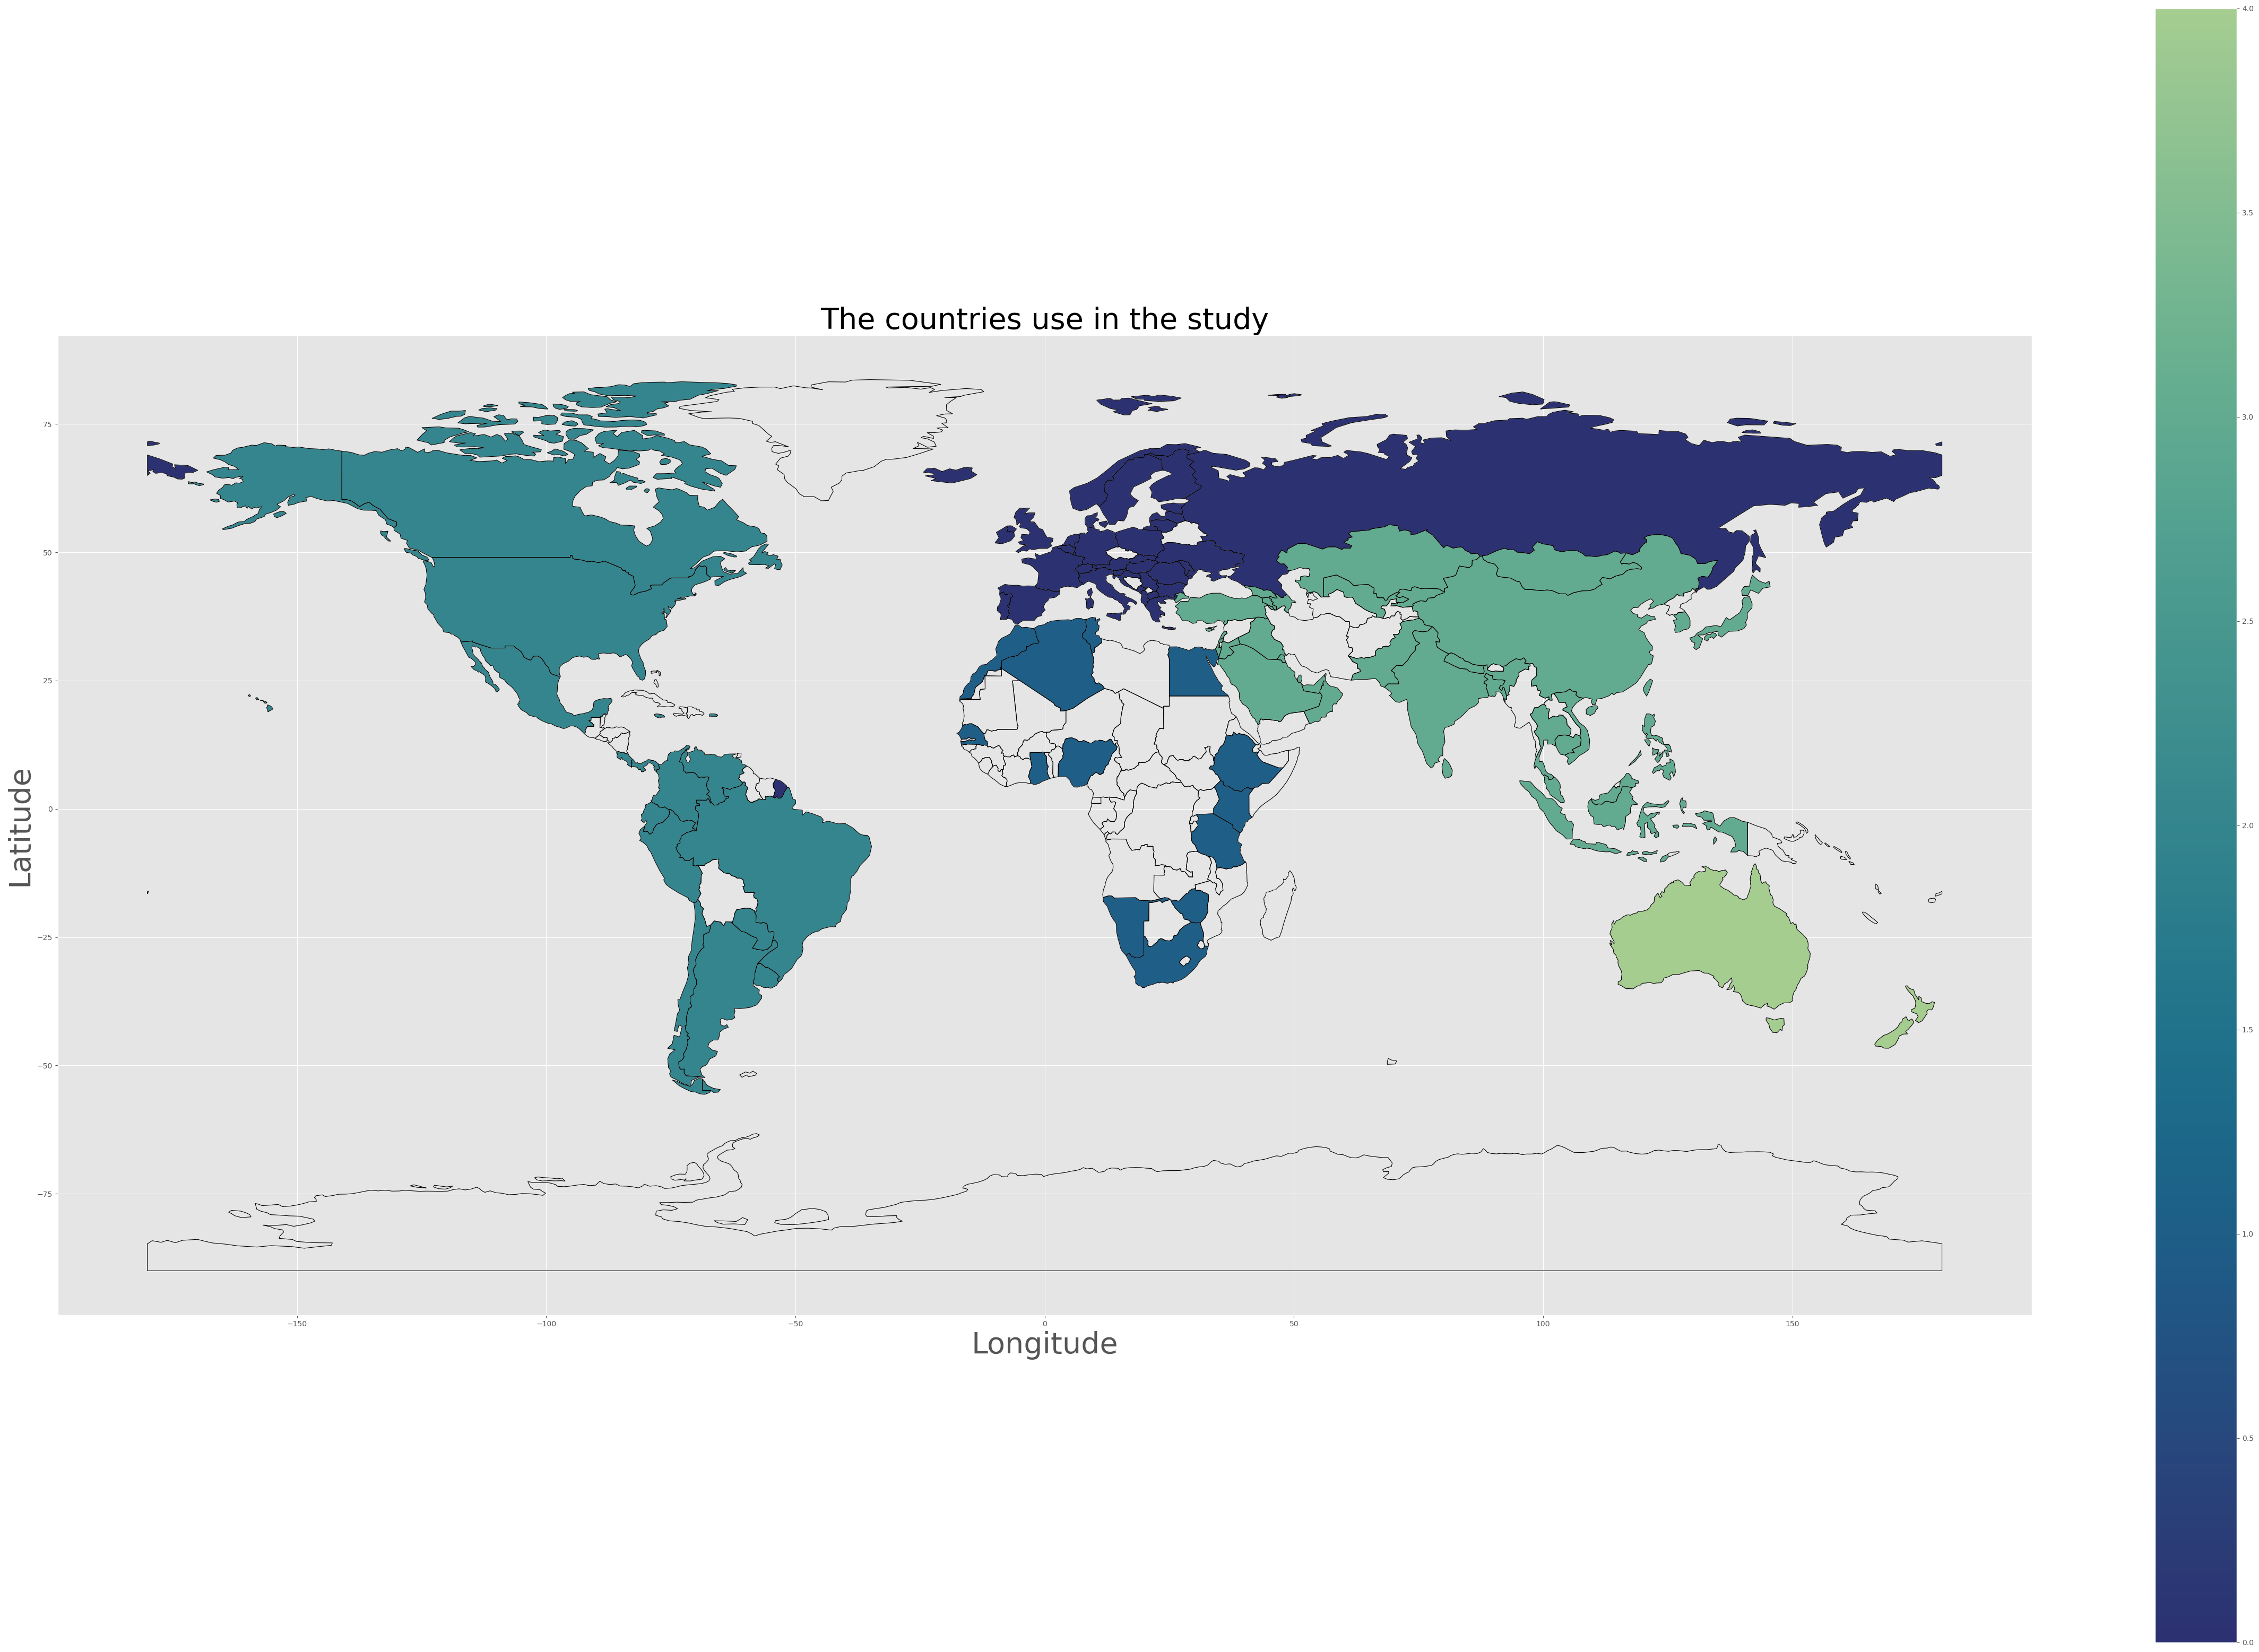

In [69]:
df_countries.insert(1, 'Population', df_countries.pop('Population'))
df_countries.insert(2, 'Yearly Change', df_countries.pop('Yearly Change'))
continents = df_countries['Continent'].unique()
df_countries['Continent_n'] = df_countries['Continent'].apply(lambda x: np.where(continents==x)[0][0])
plot_country_bubbles(df_countries, v_name_color='Continent_n', title='The countries use in the study', cmap_color='crest_r')
df_countries.drop(columns=['Continent_n'], inplace=True)

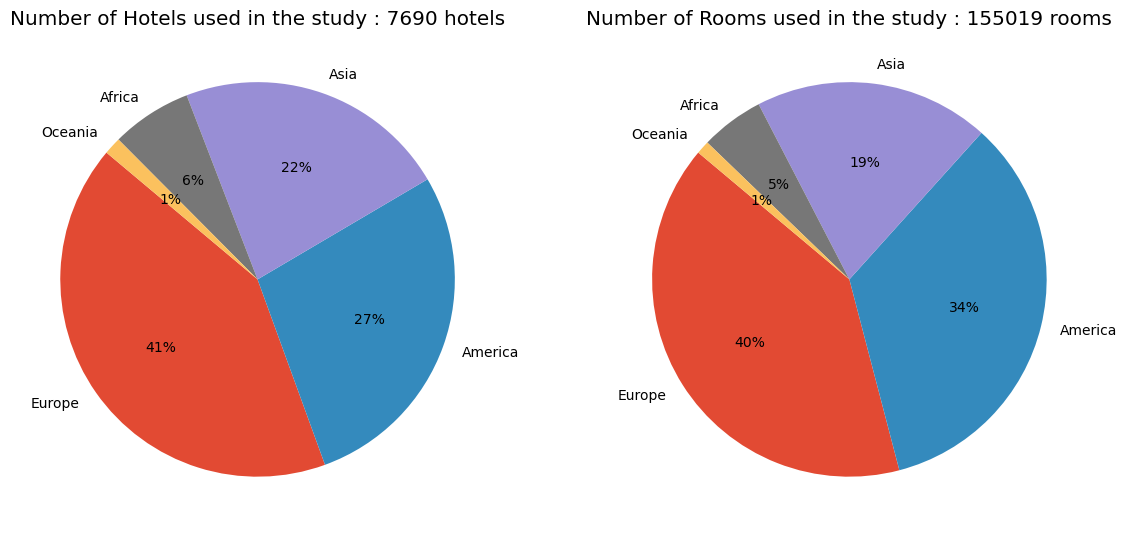

In [70]:
df = pd.merge(df_cities, df_countries, on='Country', how='inner')
df = pd.merge(df, df_hotels, on='City', how='inner')

fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Hotel counts
hotel_counts = df['Continent'].value_counts()
total_hotels = hotel_counts.sum()
axs[0].pie(hotel_counts, labels=hotel_counts.index, autopct='%1d%%', startangle=140, textprops={'color':"black"})
axs[0].set_title(f'Number of Hotels used in the study : {total_hotels} hotels', color='black')

# Room counts
df = pd.merge(df, df_hotel_rooms, on='Url link', how='inner')
room_counts = df['Continent'].value_counts()
total_rooms = room_counts.sum()
axs[1].pie(room_counts, labels=room_counts.index, autopct='%1d%%', startangle=140, textprops={'color':"black"})
axs[1].set_title(f'Number of Rooms used in the study : {total_rooms} rooms', color='black')

plt.show()

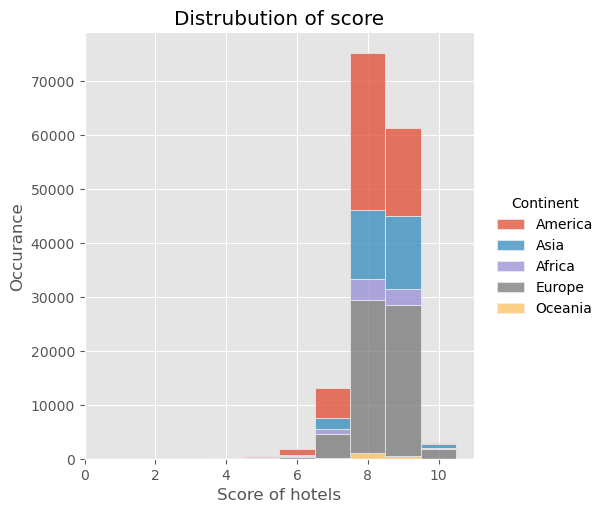

In [71]:
with warnings.catch_warnings():
	warnings.simplefilter("ignore")
	sns.displot(df_full, x="Score", kind="hist", hue="Continent", discrete=True, multiple="stack")
	plt.title("Distrubution of score")
	plt.ylabel("Occurance")
	plt.xlabel("Score of hotels")
	plt.show()

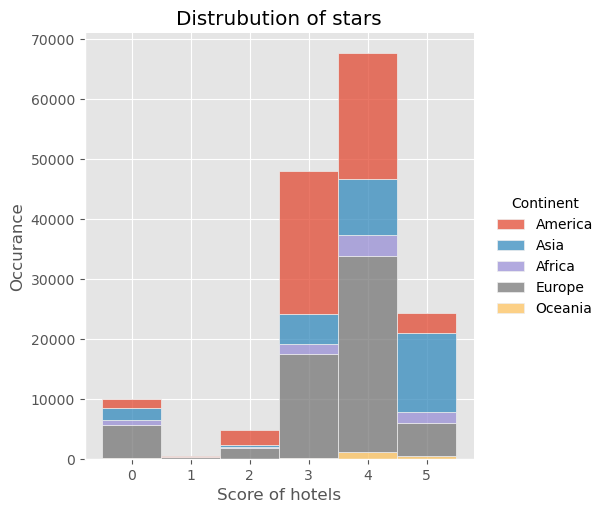

In [72]:
with warnings.catch_warnings():
	warnings.simplefilter("ignore")
	sns.displot(df_full, x="Stars", kind="hist", hue="Continent", discrete=True, multiple="stack")
	plt.title("Distrubution of stars")
	plt.ylabel("Occurance")
	plt.xlabel("Score of hotels")
	plt.show()

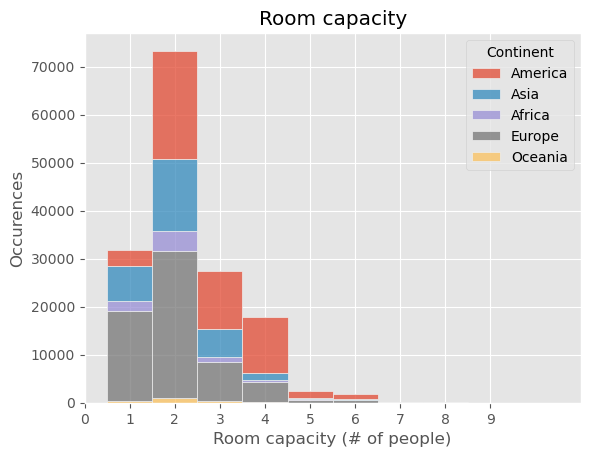

In [73]:
with warnings.catch_warnings():
	warnings.simplefilter("ignore")
	sns.histplot(df_full, x="Guests nb",discrete=True, hue="Continent", multiple="stack")
	plt.title("Room capacity")
	plt.ylabel("Occurences")
	plt.xlabel("Room capacity (# of people)")
	plt.xticks(range(0,10))
	plt.xlim([0,11])
	plt.show()

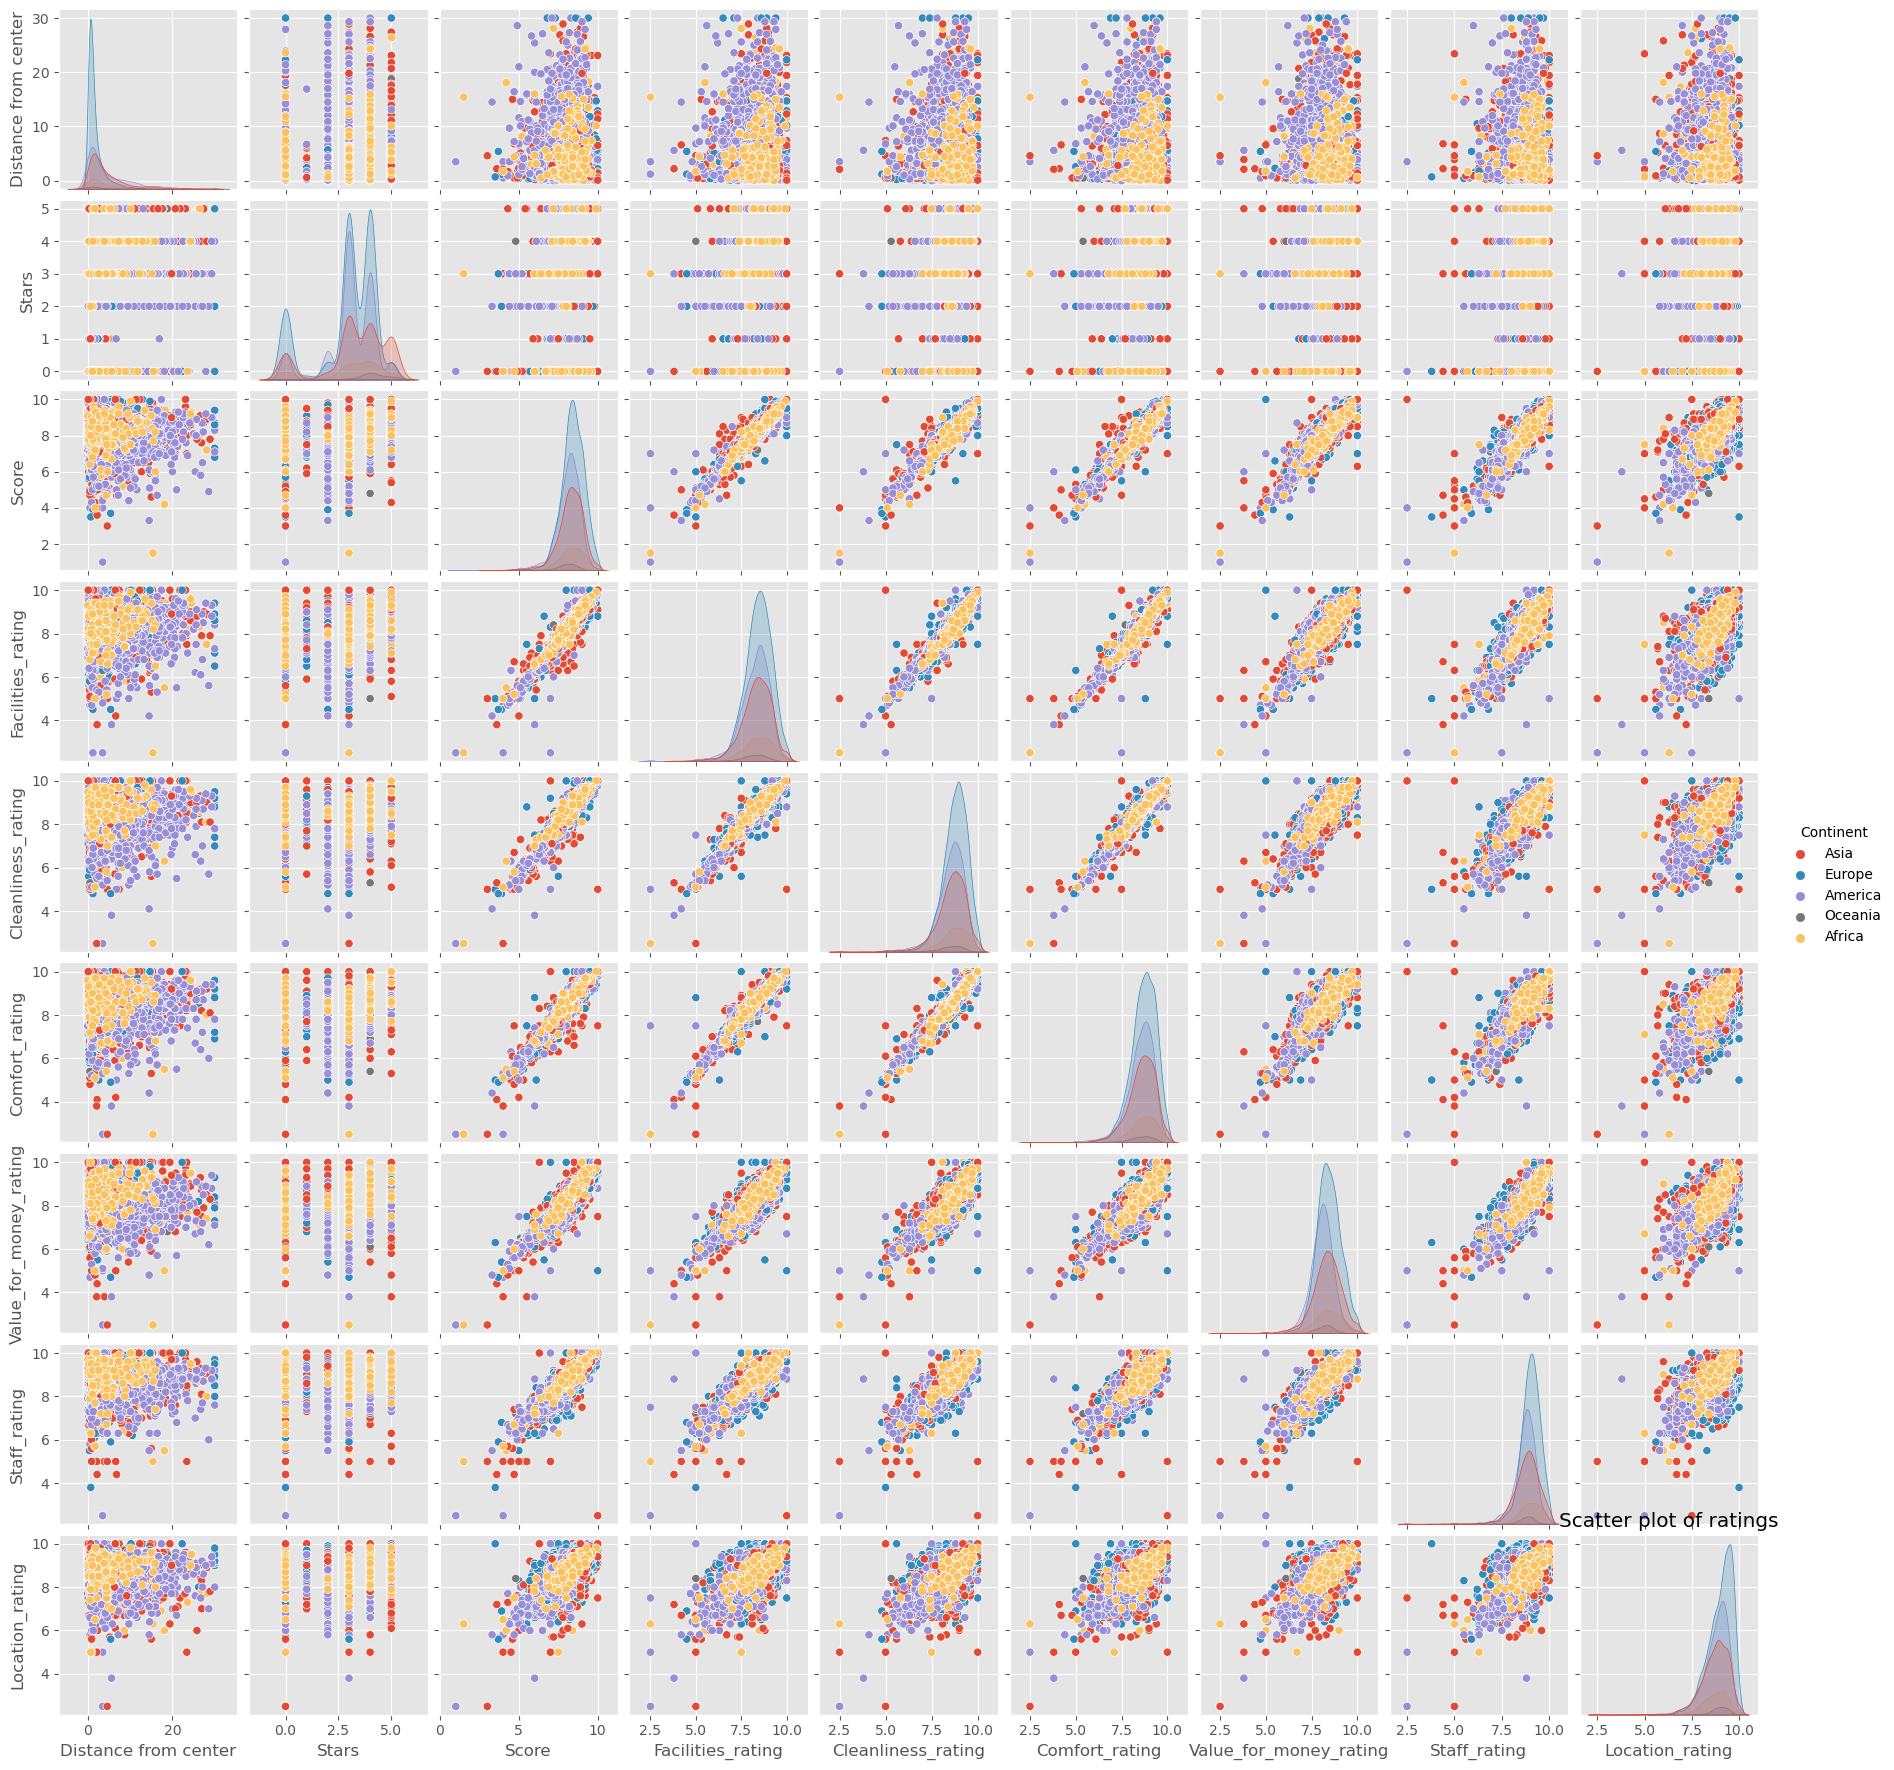

In [74]:
vars=["Distance from center", "Stars", "Score","Facilities_rating","Cleanliness_rating","Comfort_rating","Value_for_money_rating","Staff_rating","Location_rating"]
with warnings.catch_warnings():
	warnings.simplefilter("ignore")
	sns.pairplot(df_full.groupby('Url link').first().reset_index(), vars=vars,
              height=2, hue="Continent")
	plt.title('Scatter plot of ratings')
	plt.show()

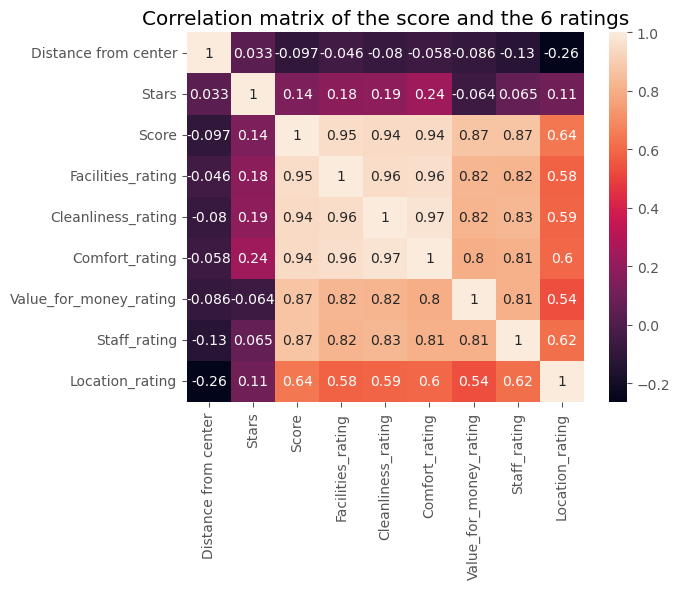

In [75]:
with warnings.catch_warnings():
	warnings.simplefilter("ignore")
	sns.heatmap(df_hotels[vars].corr(), annot=True)
	plt.title("Correlation matrix of the score and the 6 ratings")
	plt.show()

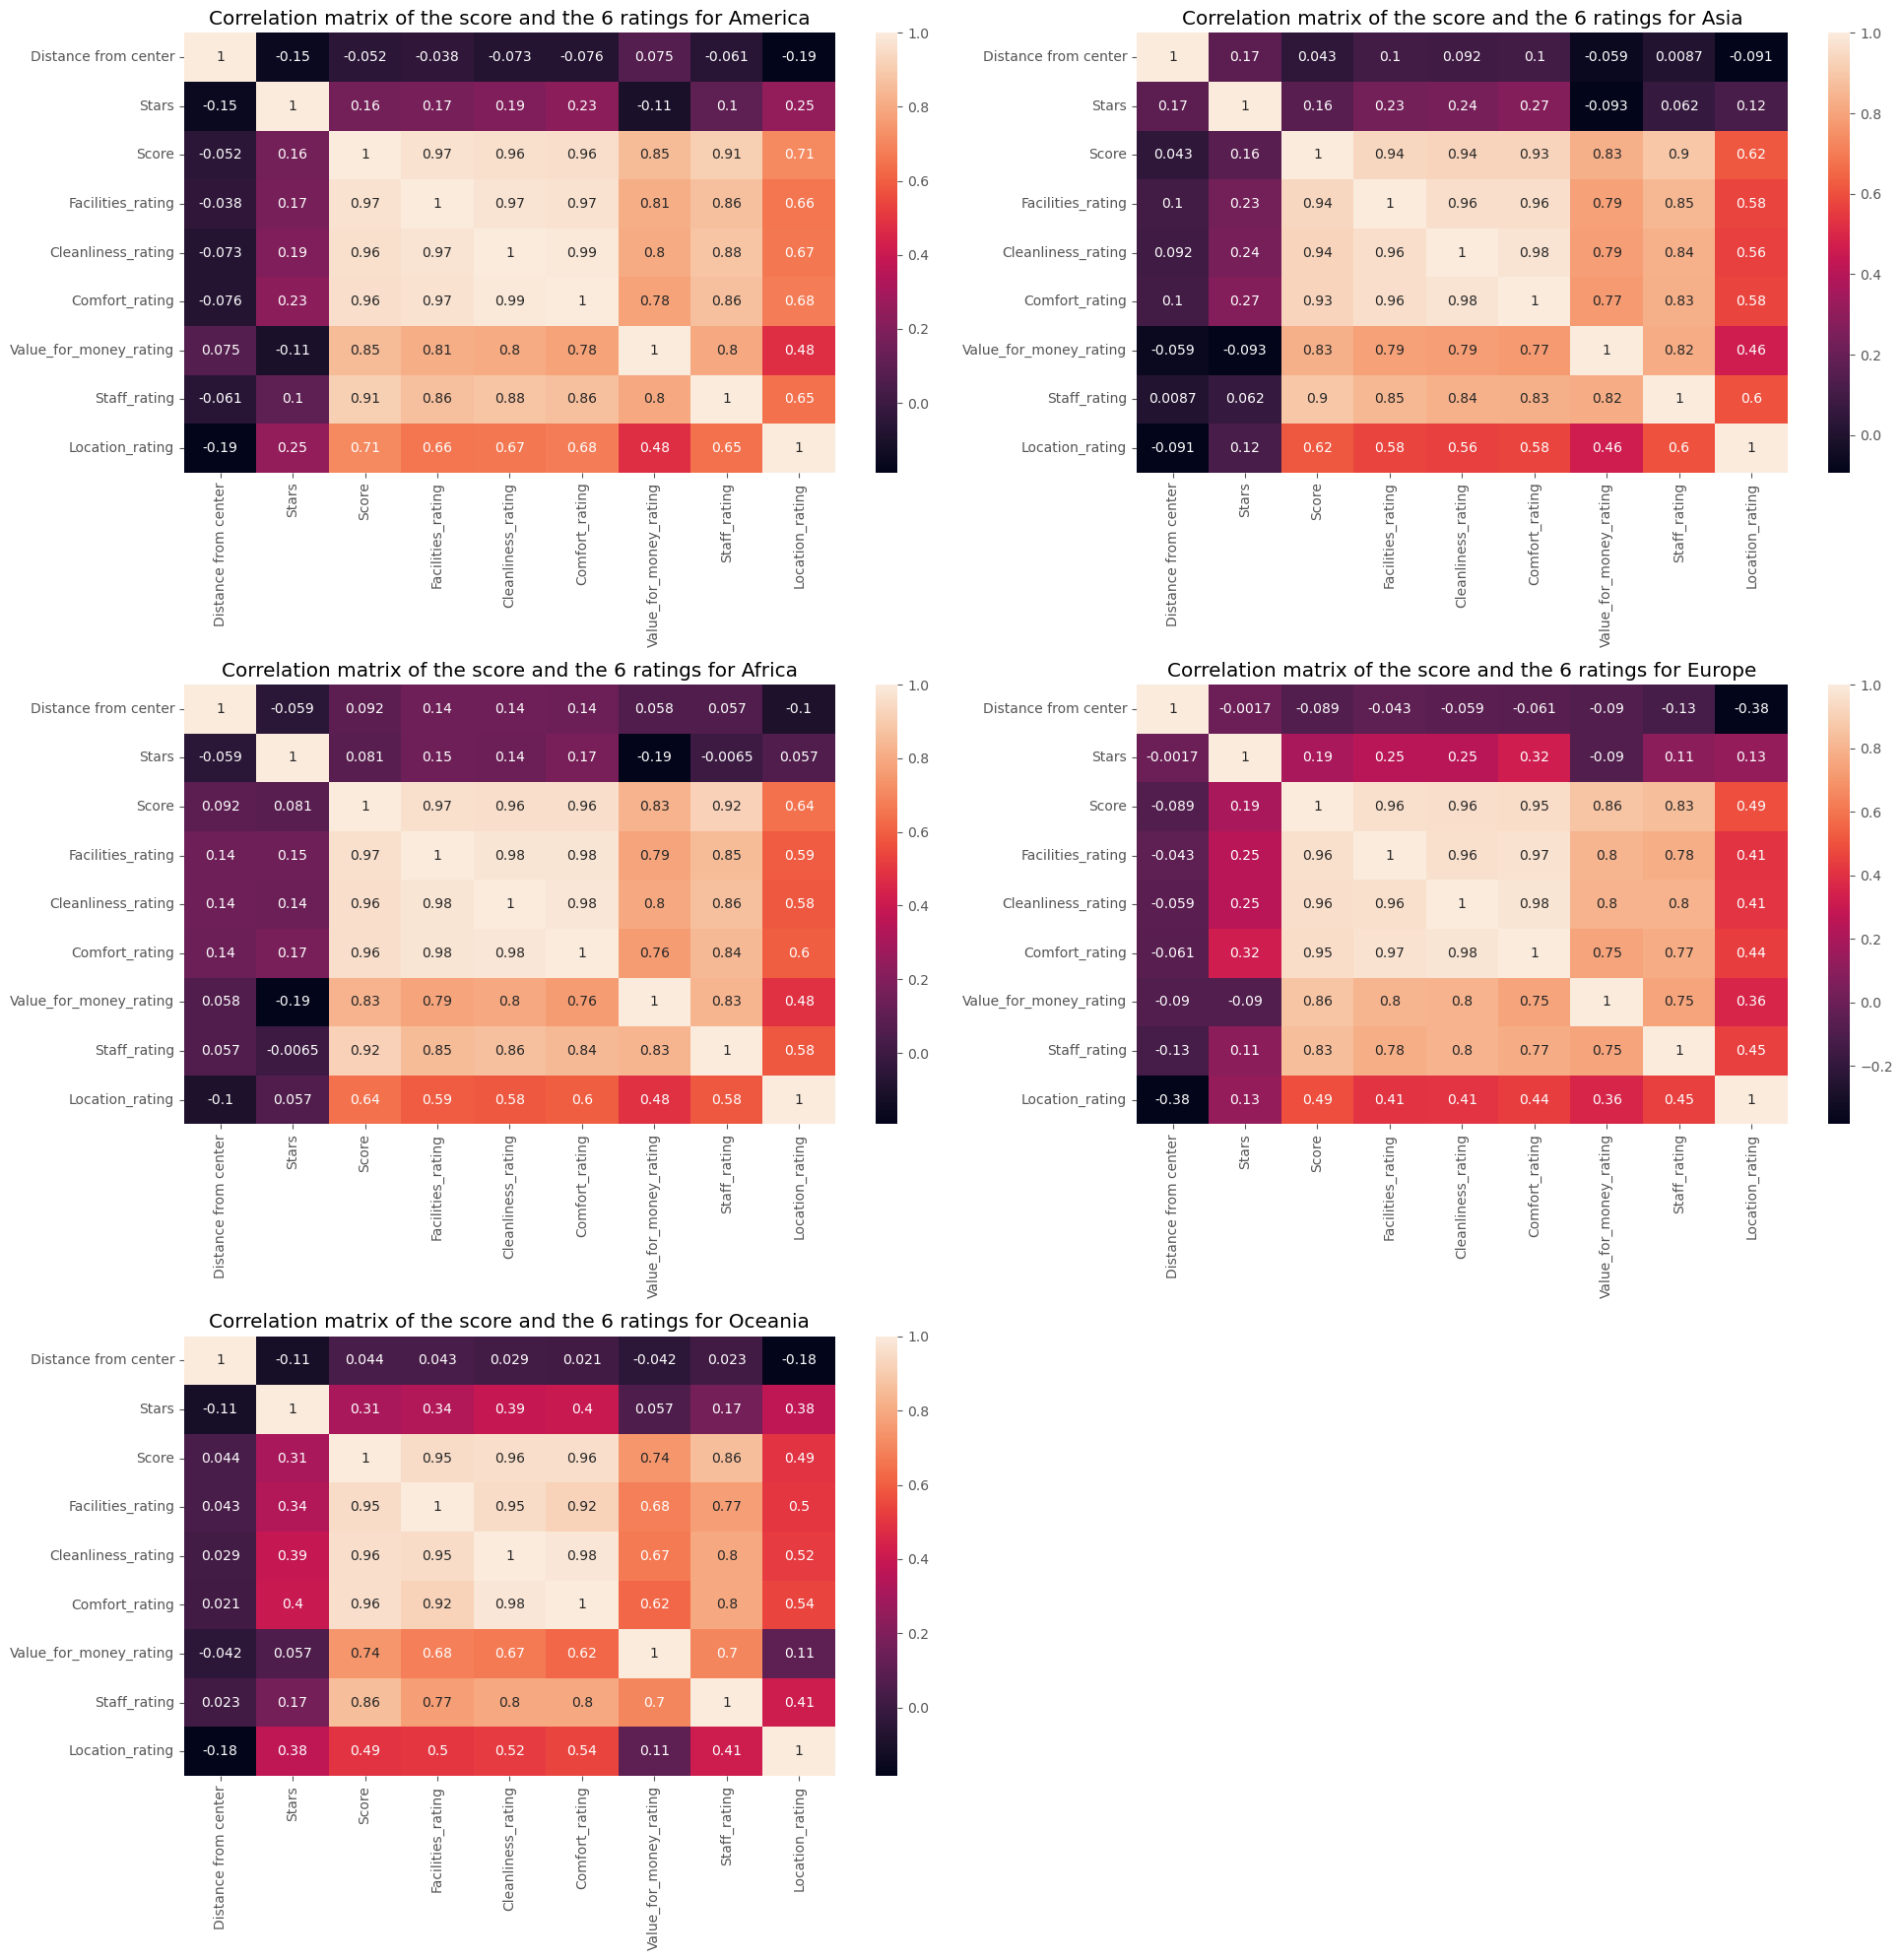

In [76]:
df = df_full.copy()
unique_hues = df['Continent'].unique()
n = len(unique_hues)

# Create a grid of subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))

for ax, hue in zip(axs.flatten(), list(unique_hues) + [None]*(2*3 - n)):
    if hue is not None:
        subset = df[df['Continent'] == hue]
        correlation_matrix = subset[vars].corr()
        
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            sns.heatmap(correlation_matrix, annot=True, ax=ax)
            ax.set_title(f"Correlation matrix of the score and the 6 ratings for {hue}")
    else:
        fig.delaxes(ax)  # Remove empty subplots

plt.tight_layout()
plt.show()

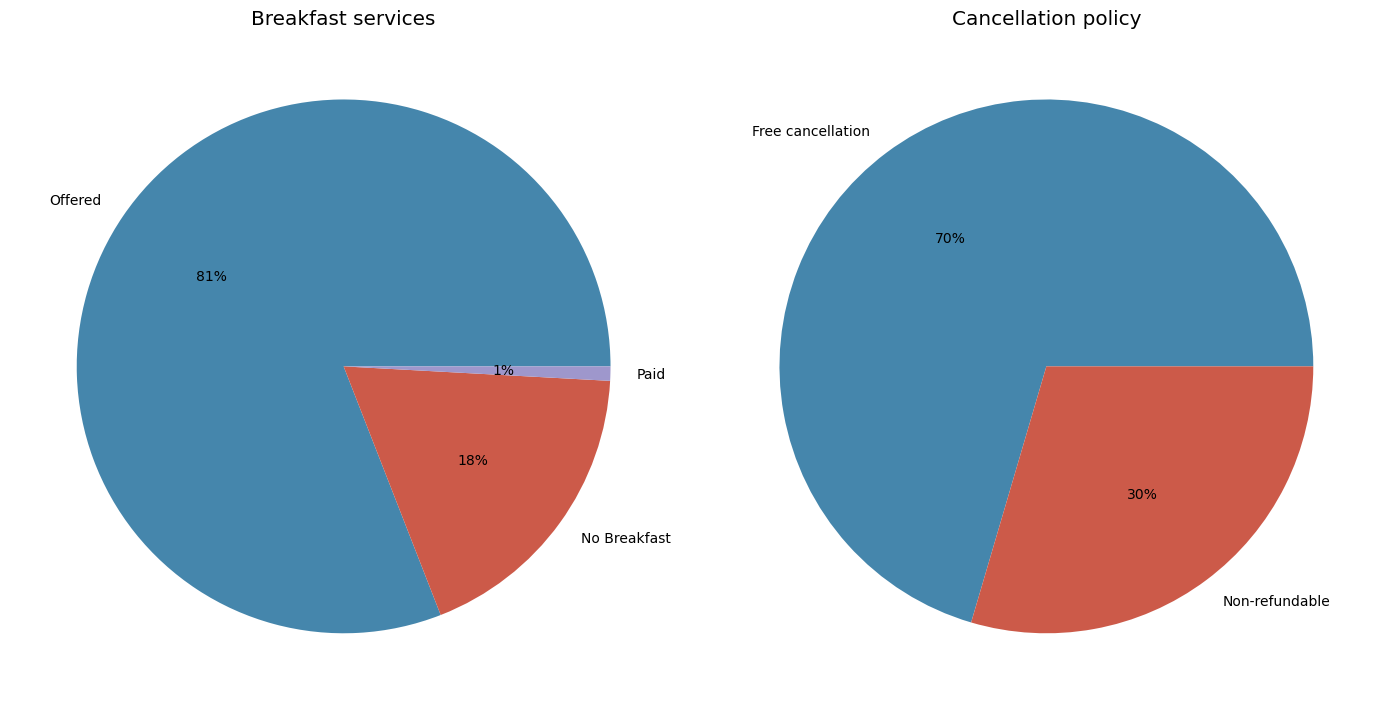

In [77]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

# Breakfast services pie chart
breakfast_counts = df_full['Breakfast'].value_counts()
breakfast_df = pd.DataFrame({
    'Type of Breakfast': ['Offered', 'No Breakfast', 'Paid'],
    'Percentage of Hotels (%)': breakfast_counts[[0, -1, 1]].values
})
axs[0].pie(breakfast_df['Percentage of Hotels (%)'], labels=breakfast_df['Type of Breakfast'], autopct='%.0f%%', colors=['#4586AC', '#CC5A49','#9E97CC']) 
axs[0].set_title("Breakfast services")

# Cancellation policy pie chart
counts = df_full["Cancellation"].value_counts()
counts_df = pd.DataFrame({
    'Cancellation Policy': ['Free cancellation' if index == 1 else 'Non-refundable' for index in counts.index],
    'Count': counts.values
})
axs[1].pie(counts_df['Count'], labels=counts_df['Cancellation Policy'], autopct='%.0f%%', colors=['#4586AC', '#CC5A49']) 
axs[1].set_title("Cancellation policy")

plt.tight_layout()
plt.show()

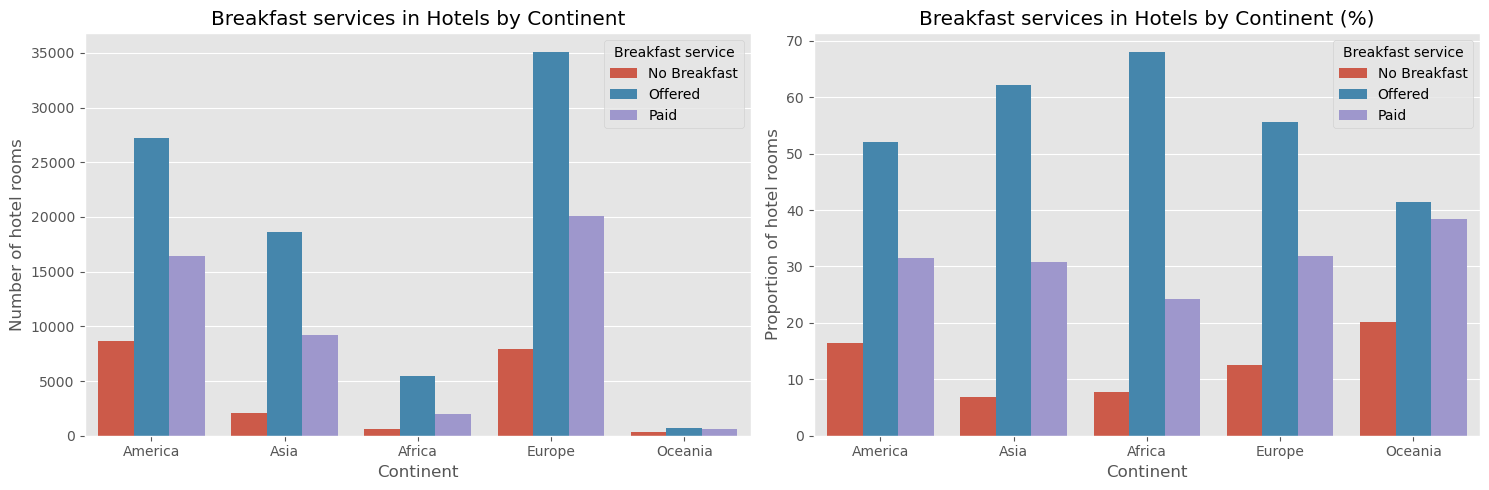

In [78]:
# Create a new DataFrame with one row for each hotel
data = []
for continent in df_full['Continent'].unique():
    free_hotels = df_full[(df_full['Continent'] == continent) & (df_full['Breakfast'] == 0)]
    no_hotels = df_full[(df_full['Continent'] == continent) & (df_full['Breakfast'] == -1)]
    paid_hotels = df_full[(df_full['Continent'] == continent) & (df_full['Breakfast'] > 0)]
    data.extend([(continent, 'No Breakfast') for _ in range(no_hotels.shape[0])])
    data.extend([(continent, 'Offered') for _ in range(free_hotels.shape[0])])
    data.extend([(continent, 'Paid') for _ in range(paid_hotels.shape[0])])

# Original Plot
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
df = pd.DataFrame(data, columns=['Continent', 'Breakfast'])
sns.countplot(x='Continent', hue='Breakfast', data=df)
plt.title('Breakfast services in Hotels by Continent')
plt.ylabel('Number of hotel rooms')
plt.xlabel('Continent')
plt.legend(title='Breakfast service')

# Normalized Plot
plt.subplot(1, 2, 2)
normalized_data = []
for continent in df_full['Continent'].unique():
    continent_data = df_full[df_full['Continent'] == continent]
    total_hotels = len(continent_data)
    no_breakfast_count = len(continent_data[continent_data['Breakfast'] == -1])
    offered_count = len(continent_data[continent_data['Breakfast'] == 0])
    paid_count = len(continent_data[continent_data['Breakfast'] > 0])
    if total_hotels > 0:
        no_breakfast_proportion = no_breakfast_count / total_hotels
        offered_proportion = offered_count / total_hotels
        paid_proportion = paid_count / total_hotels
        normalized_data.append((continent, 'No Breakfast', no_breakfast_proportion*100))
        normalized_data.append((continent, 'Offered', offered_proportion*100))
        normalized_data.append((continent, 'Paid', paid_proportion*100))

df_normalized = pd.DataFrame(normalized_data, columns=['Continent', 'Breakfast', 'Proportion'])
sns.barplot(x='Continent', y='Proportion', hue='Breakfast', data=df_normalized)
plt.title('Breakfast services in Hotels by Continent (%)')
plt.ylabel('Proportion of hotel rooms')
plt.xlabel('Continent')
plt.legend(title='Breakfast service')

plt.tight_layout()
plt.show()


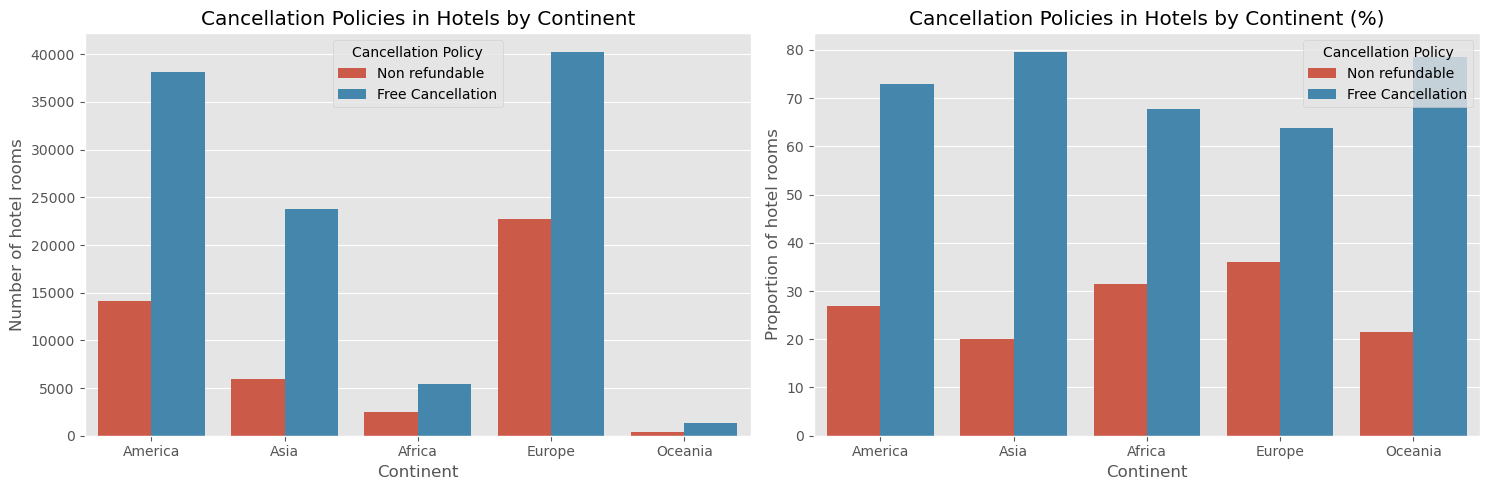

In [79]:
# Create a new DataFrame with one row for each hotel
data = []
for continent in df_full['Continent'].unique():
    free_cancellation = df_full[(df_full['Continent'] == continent) & (df_full['Cancellation'] == 1)]
    no_cancellation = df_full[(df_full['Continent'] == continent) & (df_full['Cancellation'] == 0)]
    data.extend([(continent, 'Non refundable') for _ in range(no_cancellation.shape[0])])
    data.extend([(continent, 'Free Cancellation') for _ in range(free_cancellation.shape[0])])

# Original Plot
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
df = pd.DataFrame(data, columns=['Continent', 'Cancellation'])
sns.countplot(x='Continent', hue='Cancellation', data=df)
plt.title('Cancellation Policies in Hotels by Continent')
plt.ylabel('Number of hotel rooms')
plt.xlabel('Continent')
plt.legend(title='Cancellation Policy')

# Normalized Plot
plt.subplot(1, 2, 2)
normalized_data = []
for continent in df_full['Continent'].unique():
    continent_data = df_full[df_full['Continent'] == continent]
    total_hotels = len(continent_data)
    free_cancellation_count = len(continent_data[continent_data['Cancellation'] == 1])
    no_cancellation_count = len(continent_data[continent_data['Cancellation'] == 0])
    if total_hotels > 0:
        no_cancellation_proportion = no_cancellation_count / total_hotels
        free_cancellation_proportion = free_cancellation_count / total_hotels
        normalized_data.append((continent, 'Non refundable', no_cancellation_proportion*100))
        normalized_data.append((continent, 'Free Cancellation', free_cancellation_proportion*100))

df_normalized = pd.DataFrame(normalized_data, columns=['Continent', 'Cancellation', 'Proportion'])
sns.barplot(x='Continent', y='Proportion', hue='Cancellation', data=df_normalized)
plt.title('Cancellation Policies in Hotels by Continent (%)')
plt.ylabel('Proportion of hotel rooms')
plt.xlabel('Continent')
plt.legend(title='Cancellation Policy')

plt.tight_layout()
plt.show()

## Relation entre score et prix
(voir fichier 3_eda2.ipynb)

## Correlation entre Evar et Hvar

In [80]:
numeric_cols = df_full.select_dtypes(include=[np.number]).columns.tolist()
# include also non numeric cols but encode them
non_numeric_cols = list(set(df_full.columns) - set(numeric_cols))
le = preprocessing.LabelEncoder()
df_full[non_numeric_cols] = df_full[non_numeric_cols].apply(lambda col: le.fit_transform(col))
all_cols = numeric_cols + non_numeric_cols
#remove Url link from all_cols
all_cols = [col for col in all_cols if col not in  ['Url link', 'Name', 'Location']]
# change only_hotel_var_list to include both numeric and non numeric vars
only_hotel_var_list = list(set(all_cols).intersection(set(columns_room)) - set(columns_city))
env_var_list =  list(set(all_cols).intersection(set(columns_city)))
display(only_hotel_var_list,env_var_list)

['Price',
 'Cleanliness_rating',
 'Room Type',
 'Location_rating',
 'NbReviews',
 'Value_for_money_rating',
 'Staff_rating',
 'Facilities_rating',
 'Guests nb',
 'Distance from center',
 'Comfort_rating',
 'Breakfast',
 'Stars',
 'Cancellation',
 'Score']

['density',
 'Rice (white), (1kg)',
 'Eggs (regular) (12)',
 'Bottle of Wine (Mid-Range)',
 'Fitness Club, Monthly Fee for 1 Adult',
 'Average Monthly Net Salary (After Tax)',
 'Taxi 1hour Waiting (Normal Tariff)',
 'Population',
 '1 Pair of Jeans (Levis 501 Or Similar)',
 'Continent',
 'Potato (1kg)',
 'net_change',
 'Apartment (3 bedrooms) in City Centre',
 'Domestic Beer (0.5 liter draught)',
 'Tennis Court Rent (1 Hour on Weekend)',
 'med_age',
 'Taxi 1km (Normal Tariff)',
 'Lettuce (1 head)',
 'Tourism_year',
 'Cappuccino (regular)',
 'Taxi Start (Normal Tariff)',
 'Water (0.33 liter bottle)',
 'Toyota Corolla Sedan 1.6l 97kW Comfort (Or Equivalent New Car)',
 'Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment',
 'Meal, Inexpensive Restaurant',
 'Banana (1kg)',
 'Beef Round (1kg) (or Equivalent Back Leg Red Meat)',
 'migrants',
 'Chicken Fillets (1kg)',
 'One-way Ticket (Local Transport)',
 'Meal for 2 People, Mid-range Restaurant, Three-course',
 'Tomato (1

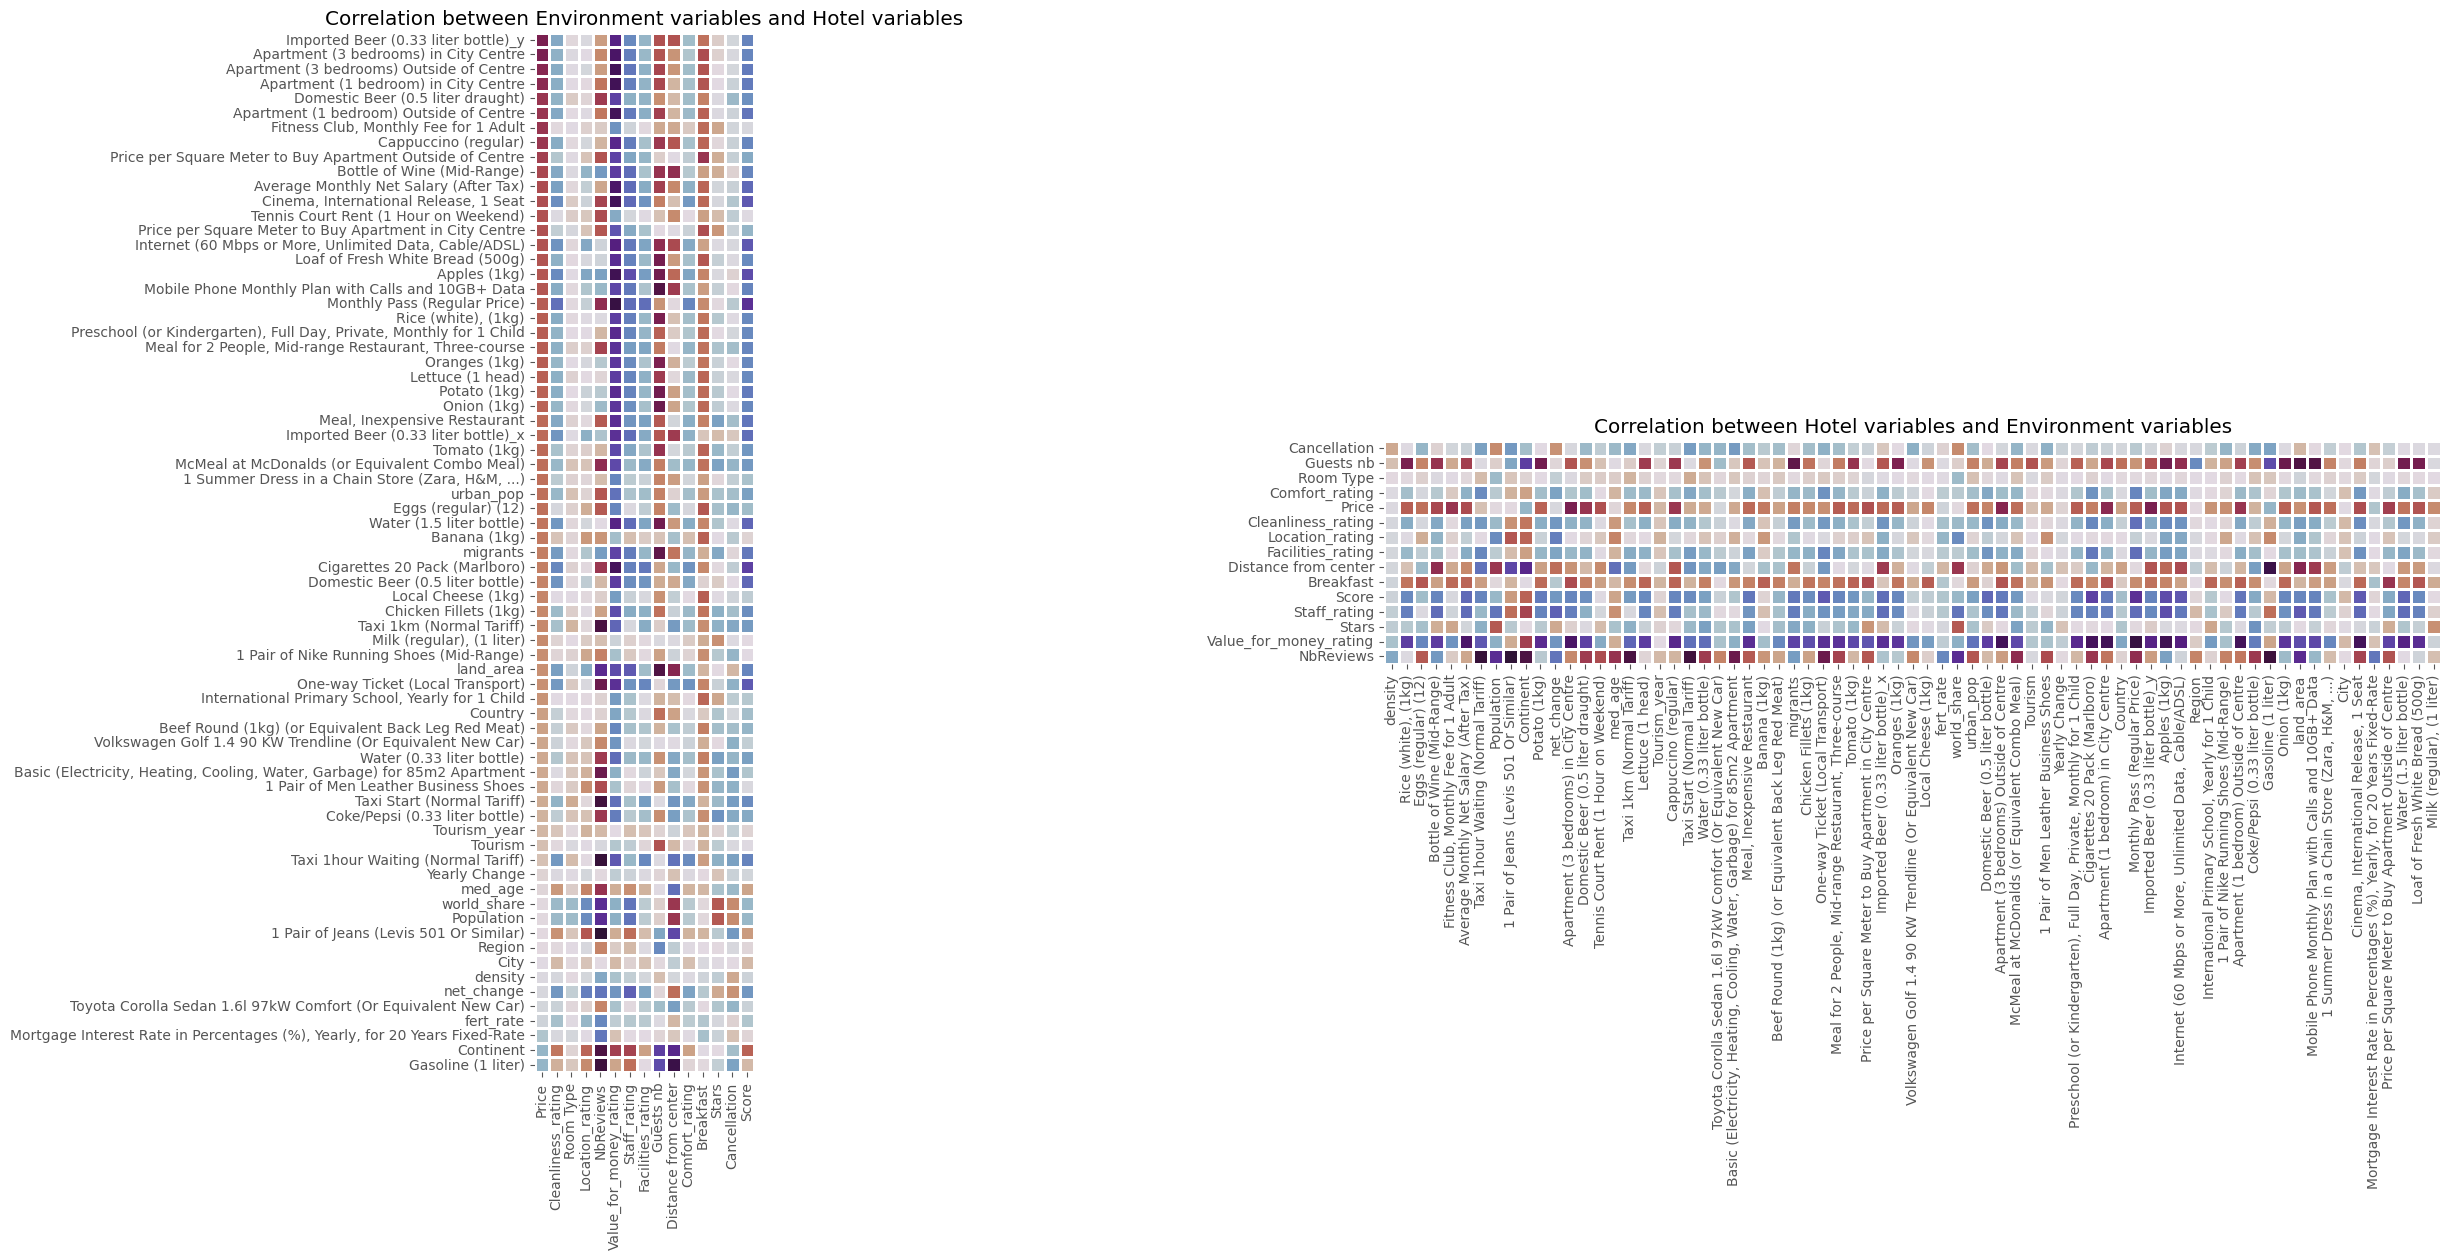

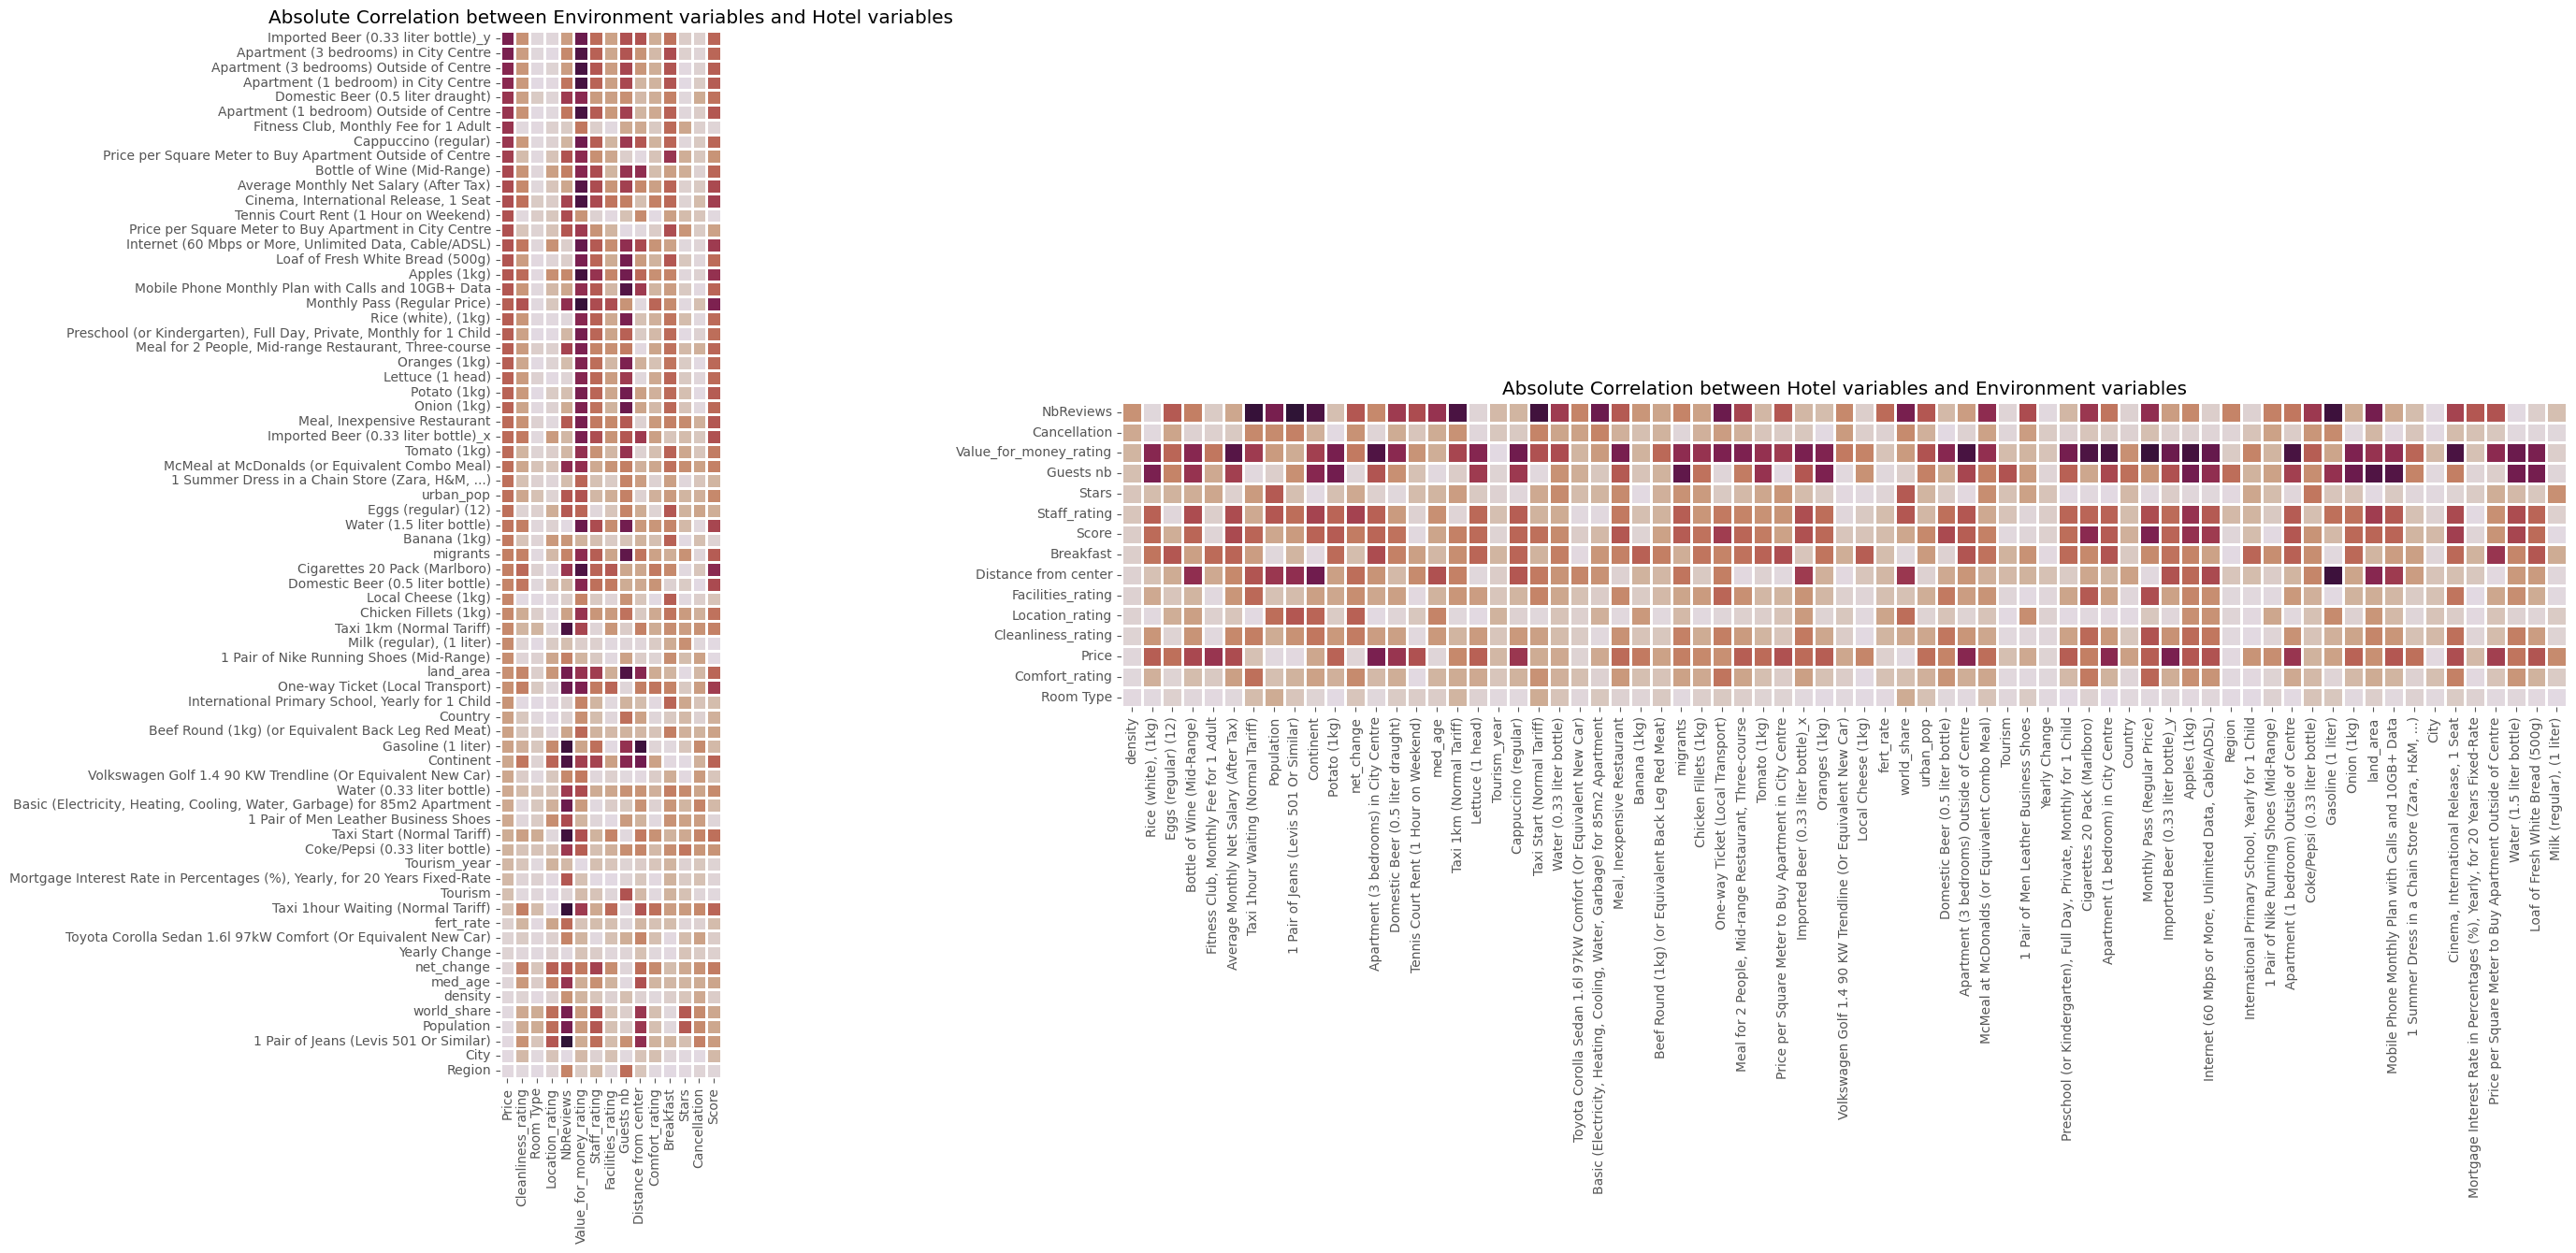

In [81]:
if os.path.exists('data/Hotel_and_Envirment_corr.csv'):
	Hotel_and_Envirment_corr = pd.read_csv('data/Hotel_and_Envirment_corr.csv')
	Hotel_and_Envirment_corr_abs = pd.read_csv('data/Hotel_and_Envirment_corr_abs.csv')
	plot_Evar_Hvar_correlations(env_vars=env_var_list, only_hotel_vars=only_hotel_var_list, df=df_full, show_both=True)
else:
	Hotel_and_Envirment_corr, Hotel_and_Envirment_corr_abs= plot_Evar_Hvar_correlations(env_vars=env_var_list, only_hotel_vars=only_hotel_var_list, df=df_full, show_both=True)
	Hotel_and_Envirment_corr.to_csv('data/Hotel_and_Envirment_corr.csv', index=False)
	Hotel_and_Envirment_corr_abs.to_csv('data/Hotel_and_Envirment_corr_abs.csv', index=False)

In [82]:
Hotel_and_Envirment_corr = Hotel_and_Envirment_corr.iloc[:, :-1]
corr_pairs = Hotel_and_Envirment_corr.unstack().sort_values(ascending=False).to_frame().reset_index()
corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
corr_pairs['Abs Correlation'] = corr_pairs['Correlation'].abs()
corr_pairs = corr_pairs.iloc[::2]
corr_pairs = corr_pairs.sort_values(by='Abs Correlation', ascending=False)
print("The most correlated pairs of variables by abs value of the correlation:")
display(corr_pairs.groupby('Variable 1')['Abs Correlation'].sum().sort_values(ascending=False).reset_index())
display(corr_pairs.head(30).reset_index(drop=True))

The most correlated pairs of variables by abs value of the correlation:


Variable 1  Abs Correlation
0   Value_for_money_rating         5.704959
1                NbReviews         4.942469
2                    Price         4.583283
3                Guests nb         4.110288
4             Staff_rating         3.977005
5                    Score         3.405502
6                Breakfast         3.285402
7     Distance from center         3.011370
8           Comfort_rating         2.487837
9        Facilities_rating         2.359561
10      Cleanliness_rating         2.250519
11                   Stars         2.230213
12            Cancellation         2.106803
13         Location_rating         1.830133
14               Room Type         0.720152

Variable 1  Variable 2  Correlation  Abs Correlation
0                NbReviews           2     0.331068         0.331068
1   Value_for_money_rating          70    -0.312896         0.312896
2                NbReviews           1     0.303843         0.303843
3   Value_for_money_rating          69    -0.297342         0.297342
4   Value_for_money_rating          67    -0.292182         0.292182
5   Value_for_money_rating          65    -0.290347         0.290347
6                NbReviews          34     0.289978         0.289978
7                Guests nb          38     0.282094         0.282094
8   Value_for_money_rating          63    -0.281659         0.281659
9                Guests nb          42     0.266503         0.266503
10  Value_for_money_rating          61    -0.262261         0.262261
11               NbReviews          19     0.256678         0.256678
12  Value_for_money_rating          59    -0.255954         0.255954
13    Distance from center           0    -0.251331         0.251331
14               Guests nb          59     0.250069         0.250069
15               Guests nb          56     0.248685         0.248685
16               NbReviews          38    -0.245891         0.245891
17  Value_for_money_rating          55    -0.243898         0.243898
18               NbReviews          17    -0.243305         0.243305
19                   Price          60     0.242770         0.242770
20  Value_for_money_rating          53    -0.242130         0.242130
21                   Price          63     0.241049         0.241049
22  Value_for_money_rating          52    -0.240067         0.240067
23  Value_for_money_rating          50    -0.237430         0.237430
24  Value_for_money_rating          48    -0.229013         0.229013
25  Value_for_money_rating          46    -0.227557         0.227557
26                   Price          67     0.227542         0.227542
27  Value_for_money_rating          45    -0.226248         0.226248
28                   Price          68     0.224961         0.224961
29                   Score          64    -0.223645         0.223645

## ACP

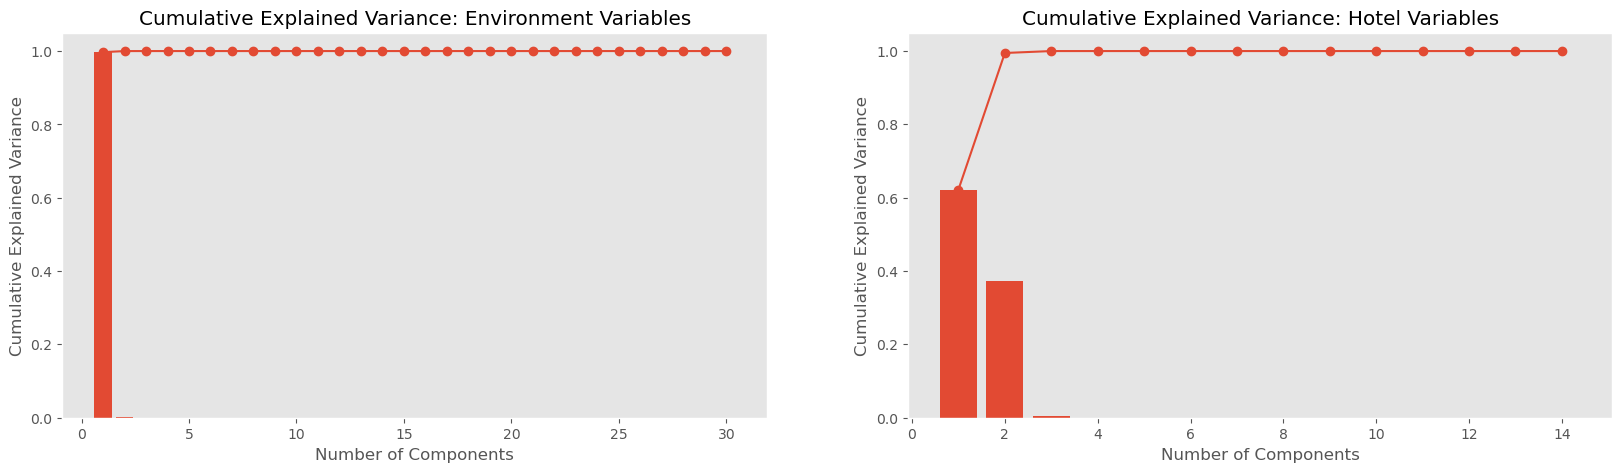

In [86]:
fig = plt.figure(figsize=(20, 5))

# First plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, index 1
pca = PCA(n_components=30)
pca.fit(df_full[env_var_list].dropna())
explained_variance = pca.explained_variance_ratio_
explained_variance_cumulative = np.cumsum(explained_variance)
plt.bar(range(1, len(explained_variance) + 1), explained_variance, label='Individual Explained Variance')
plt.plot(range(1, len(explained_variance) + 1), explained_variance_cumulative, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance: Environment Variables')
plt.grid()

# Second plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, index 2
pca_hotels = PCA()
only_hotel_var_list.remove('Score')
pca_hotels.fit(df_full[only_hotel_var_list].dropna())
only_hotel_var_list.append('Score')
explained_variance = pca_hotels.explained_variance_ratio_
explained_variance_cumulative = np.cumsum(explained_variance)
plt.bar(range(1, len(explained_variance) + 1), explained_variance, label='Individual Explained Variance')
plt.plot(range(1, len(explained_variance) + 1), explained_variance_cumulative, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance: Hotel Variables')
plt.grid()

plt.show()

In [87]:
num_pcs = 2
num_pcs_hotel = 2

pca_components_env = pca.fit_transform(df_full[env_var_list].dropna())
df_pca_env = pd.DataFrame(data = pca_components_env[:, :num_pcs], 
						  columns = [f'PC{i+1}_env' for i in range(num_pcs)])

pca_components_hotel = pca_hotels.fit_transform(df_full[only_hotel_var_list].dropna())
df_pca_hotel = pd.DataFrame(data = pca_components_hotel[:, :num_pcs_hotel], 
							columns = [f'PC{i+1}_hotel' for i in range(num_pcs_hotel)])
df_full_reset = df_full.reset_index(drop=True)
only_hotel_var_list.remove('Score')
df_full_dropped = df_full_reset.drop(columns=env_var_list + only_hotel_var_list)
only_hotel_var_list.append('Score')

df_pca = pd.concat([df_full_dropped, df_pca_env, df_pca_hotel], axis=1)
df_pca = df_pca.drop(columns=['Name', 'Location', 'Url link',"Region Number","Continent Number"])
df_pca = df_pca.dropna()
display(df_pca.shape, df_pca.describe())

(36184, 5)

Score       PC1_env       PC2_env     PC1_hotel     PC2_hotel
count  36184.000000  3.618400e+04  3.618400e+04  36184.000000  36184.000000
mean       8.416419 -2.698879e-08  2.582912e-09    -78.777022   -455.064489
std        0.672163  4.467956e+08  2.429488e+07   3770.167827   2599.834420
min        1.000000 -1.989640e+08 -1.872312e+07  -7037.229035  -2791.655596
25%        8.000000 -1.912886e+08 -1.557861e+07  -3511.270953  -1880.469514
50%        8.500000 -1.635518e+08 -7.933832e+06     28.099303  -1204.130702
75%        8.900000 -1.325222e+08  7.391847e+06   3448.424148     41.097787
max       10.000000  1.228424e+09  9.808019e+07   7871.074707  25725.868999

In [88]:
df_pca.head(2)

Score       PC1_env       PC2_env    PC1_hotel   PC2_hotel
0    8.2 -7.167888e+07  3.191793e+07 -1233.837404 -848.504995
1    8.2 -7.167888e+07  3.191793e+07 -1233.806019 -848.452207

## 3. MODELE

## 3.1 score prediction

In [89]:
# X_train, X_test, y_train, y_test = train_test_split(df_pca_train.drop("Score"), df_pca['Score'], test_size=0.2, random_state=42)
from sklearn.metrics import r2_score
X_train, X_test, y_train, y_test = train_test_split(df_pca[["PC1_env","PC2_env","PC1_hotel","PC2_hotel"]],df_pca["Score"] , test_size=0.2, random_state=42)
# Step 5: Train your model (e.g., Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Evaluate your model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print(r2)

Mean Squared Error: 0.43708761421946907
0.015037726477916902


In [90]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

# Step 6: Evaluate your model
y_pred_rf  = model_rf.predict(X_test)
mse_rf  = mean_squared_error(y_test, y_pred_rf )
r2_rf = r2_score(y_test, y_pred_rf)
print("Mean Squared Error:", mse_rf )
print("R-squared:", r2_rf)


Mean Squared Error: 0.11518390134012128
R-squared: 0.7404369429691889


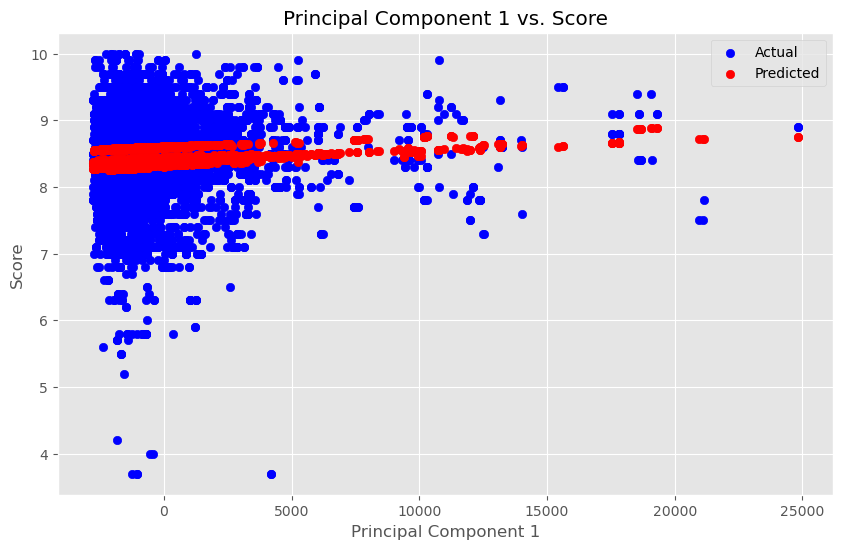

In [91]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test["PC2_hotel"], y_test, color='blue', label='Actual')
plt.scatter(X_test["PC2_hotel"], y_pred, color='red', label='Predicted')
plt.xlabel('Principal Component 1')
plt.ylabel('Score')
plt.title('Principal Component 1 vs. Score')
plt.legend()
plt.show()

PCA avec moins de colonne:


In [92]:
df_hotel_rooms = df_full[['Url link'] +list(set(columns_room) - set(columns_hotel))]
df_hotel_rooms.head(2) 

Url link  Price  Room Type  Guests nb  Breakfast  Cancellation
0      5165  342.0       5760        2.0       23.0           1.0
1      5165  379.0       5760        2.0        0.0           1.0

In [93]:
df_hotels.head(2)

Name Location  Stars  Score  \
0  Ajman Saray, a Luxury Collection Resort, Ajman    Ajman      5    8.7   
1        Al Badayer Retreat by Sharjah Collection  Sharjah      5    9.1   

   Distance from center     City  Location_rating  NbReviews  \
0                   3.0    Ajman              8.9     1441.0   
1                   0.1  Sharjah              9.0     1606.0   

   Value_for_money_rating  Staff_rating  Facilities_rating  \
0                     8.1           9.0                8.9   
1                     8.7           9.7                9.1   

                                            Url link  Comfort_rating  \
0  https://www.booking.com/hotel/ae/ajman-saray-a...             9.1   
1  https://www.booking.com/hotel/ae/al-badayer-re...             9.4   

   Cleanliness_rating  
0                 9.0  
1                 9.4

In [94]:
df_cities.head(2)

City  Country  Rice (white), (1kg)  \
0  Aachen  Germany                 2.79   
1  Aarhus  Denmark                 2.20   

   Fitness Club, Monthly Fee for 1 Adult  Taxi 1hour Waiting (Normal Tariff)  \
0                                  28.00                                 NaN   
1                                  36.48                                 NaN   

   Apartment (3 bedrooms) in City Centre  Potato (1kg)  \
0                                1400.00          1.41   
1                                2074.53          1.83   

   Domestic Beer (0.5 liter draught)  Tennis Court Rent (1 Hour on Weekend)  \
0                               4.20                                   14.5   
1                               6.69                                    NaN   

   Cappuccino (regular)  Taxi Start (Normal Tariff)  \
0                  3.13                         NaN   
1                  5.79                        6.69   

   Toyota Corolla Sedan 1.6l 97kW Comfort (Or Equivalent New Car)  \
0                                                NaN                
1                                           42605.95                

   Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment  \
0                                             323.67                          
1                                             194.87                          

   Banana (1kg)  Beef Round (1kg) (or Equivalent Back Leg Red Meat)  \
0          1.31                                              16.73    
1          2.88                                              19.39    

   Chicken Fillets (1kg)  Tomato (1kg)  \
0                  14.96           3.0   
1                  10.32           5.0   

   Price per Square Meter to Buy Apartment in City Centre  \
0                                            6490.00        
1                                            6265.42        

   Volkswagen Golf 1.4 90 KW Trendline (Or Equivalent New Car)  \
0                                                NaN             
1                                                NaN             

   Local Cheese (1kg)  McMeal at McDonalds (or Equivalent Combo Meal)  \
0               12.27                                           10.00   
1               11.06                                           12.38   

   1 Pair of Men Leather Business Shoes  Apartment (1 bedroom) in City Centre  \
0                                117.50                                625.56   
1                                155.03                               1171.99   

   Apples (1kg)  International Primary School, Yearly for 1 Child  \
0          2.62                                               NaN   
1          2.56                                               NaN   

   Coke/Pepsi (0.33 liter bottle)  Loaf of Fresh White Bread (500g)  \
0                            2.38                              1.92   
1                            4.17                              2.80   

   Milk (regular), (1 liter)  Eggs (regular) (12)  Bottle of Wine (Mid-Range)  \
0                       1.04                 3.21                        5.99   
1                       1.72                 4.07                        8.70   

   Average Monthly Net Salary (After Tax)  \
0                                 2740.90   
1                                 3392.21   

   1 Pair of Jeans (Levis 501 Or Similar)  Taxi 1km (Normal Tariff)  \
0                                   89.43                       NaN   
1                                   97.03                       NaN   

   Lettuce (1 head)  Water (0.33 liter bottle)  Meal, Inexpensive Restaurant  \
0              1.89                       2.26                         11.85   
1              2.09                       3.03                         20.08   

   One-way Ticket (Local Transport)  \
0                              3.00   
1                              2.94   

   Meal for 2 People, Mid-range Restaurant, Th

In [95]:
df_hotels_cities = pd.merge(df_hotels,df_cities, on='City', how='inner')
df_hotels_cities.head(2)

Name Location  Stars  Score  \
0  Ajman Saray, a Luxury Collection Resort, Ajman    Ajman      5    8.7   
1        Al Badayer Retreat by Sharjah Collection  Sharjah      5    9.1   

   Distance from center     City  Location_rating  NbReviews  \
0                   3.0    Ajman              8.9     1441.0   
1                   0.1  Sharjah              9.0     1606.0   

   Value_for_money_rating  Staff_rating  Facilities_rating  \
0                     8.1           9.0                8.9   
1                     8.7           9.7                9.1   

                                            Url link  Comfort_rating  \
0  https://www.booking.com/hotel/ae/ajman-saray-a...             9.1   
1  https://www.booking.com/hotel/ae/al-badayer-re...             9.4   

   Cleanliness_rating               Country  Rice (white), (1kg)  \
0                 9.0  United Arab Emirates                  NaN   
1                 9.4  United Arab Emirates                 1.58   

   Fitness Club, Monthly Fee for 1 Adult  Taxi 1hour Waiting (Normal Tariff)  \
0                                  48.18                                7.66   
1                                  49.12                                5.62   

   Apartment (3 bedrooms) in City Centre  Potato (1kg)  \
0                                3613.40          0.77   
1                                1403.35          0.90   

   Domestic Beer (0.5 liter draught)  Tennis Court Rent (1 Hour on Weekend)  \
0                                NaN                                    NaN   
1                                NaN                                  16.13   

   Cappuccino (regular)  Taxi Start (Normal Tariff)  \
0                  3.70                        3.19   
1                  3.89                        3.58   

   Toyota Corolla Sedan 1.6l 97kW Comfort (Or Equivalent New Car)  \
0                                           21950.51                
1                                           20136.05                

   Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment  \
0                                             142.47                          
1                                             162.95                          

   Banana (1kg)  Beef Round (1kg) (or Equivalent Back Leg Red Meat)  \
0          1.28                                               5.39    
1          1.48                                               7.97    

   Chicken Fillets (1kg)  Tomato (1kg)  \
0                   5.71          1.17   
1                   5.83          1.14   

   Price per Square Meter to Buy Apartment in City Centre  \
0                                                NaN        
1                                                NaN        

   Volkswagen Golf 1.4 90 KW Trendline (Or Equivalent New Car)  \
0                                                NaN             
1                                           35817.84             

   Local Cheese (1kg)  McMeal at McDonalds (or Equivalent Combo Meal)  \
0                 NaN                                             NaN   
1                 8.1                                            7.66   

   1 Pair of Men Leather Business Shoes  Apartment (1 bedroom) in City Centre  \
0                                 73.69                               1762.90   
1                                 63.02                                894.23   

   Apples (1kg)  International Primary School, Yearly for 1 Child  \
0          1.79                                               NaN   
1          1.69                                           5216.32   

   Coke/Pepsi (0.33 liter bottle)  Loaf of Fresh White Bread (500g)  \
0                            0.67                              0.93   
1                            0.82                              1.16   

   Milk (regular), (1 liter)  Eggs (regular) (12)  Bottle of Wine (Mid-Range)  \
0                       1.62                 1.81        

In [96]:
cols_to_use =['International Primary School, Yearly for 1 Child',
       'Apartment (1 bedroom) Outside of Centre',
       'Apartment (1 bedroom) in City Centre',
       'Apartment (3 bedrooms) Outside of Centre',
       'Apartment (3 bedrooms) in City Centre',
       'McMeal at McDonalds (or Equivalent Combo Meal)',
       'Cinema, International Release, 1 Seat', 
       'Meal for 2 People, Mid-range Restaurant, Three-course',
       'Cappuccino (regular)', 'Domestic Beer (0.5 liter draught)',
       'Average Monthly Net Salary (After Tax)',
       'Monthly Pass (Regular Price)', 
       'Loaf of Fresh White Bread (500g)', 
       'Imported Beer (0.33 liter bottle)_y'
       ]

In [97]:
mean_price_by_city = df_hotels_cities.groupby(['City']+cols_to_use)['Score'].mean().reset_index()

# Display the resulting Series
display(mean_price_by_city.head(2))
df=mean_price_by_city.copy()

City  International Primary School, Yearly for 1 Child  \
0   Aberdeen                                          13187.70   
1  Abu Dhabi                                          11050.88   

   Apartment (1 bedroom) Outside of Centre  \
0                                   709.61   
1                                  1019.36   

   Apartment (1 bedroom) in City Centre  \
0                                717.50   
1                               1489.59   

   Apartment (3 bedrooms) Outside of Centre  \
0                                   1352.86   
1                                   2358.29   

   Apartment (3 bedrooms) in City Centre  \
0                                1350.59   
1                                3410.43   

   McMeal at McDonalds (or Equivalent Combo Meal)  \
0                                            7.86   
1                                            8.94   

   Cinema, International Release, 1 Seat  \
0                                   8.77   
1                                  12.77   

   Meal for 2 People, Mid-range Restaurant, Three-course  \
0                                              61.36       
1                                              71.54       

   Cappuccino (regular)  Domestic Beer (0.5 liter draught)  \
0                  3.97                               4.68   
1                  5.63                              12.26   

   Average Monthly Net Salary (After Tax)  Monthly Pass (Regular Price)  \
0                                 3005.28                         88.83   
1                                 3403.96                         20.44   

   Loaf of Fresh White Bread (500g)  Imported Beer (0.33 liter bottle)_y  \
0                              1.42                                 5.26   
1                              1.26                                11.50   

   Score  
0  8.284  
1  8.500

Non numeric columns:  ['City']
columns: 14


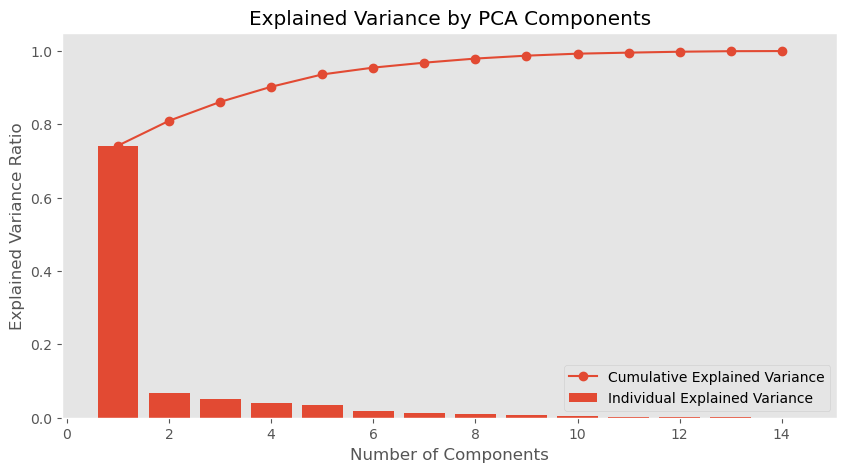

In [98]:
non_numeric_cols = df.drop(['Score'],axis=1,inplace=False).select_dtypes(include='object').columns.tolist()
print("Non numeric columns: ",non_numeric_cols)

# Remove non-numeric columns
numeric_cols = df.drop('Score',axis=1,inplace=False).drop(non_numeric_cols, axis=1)
print('columns:',len(numeric_cols.columns))

# Handle missing values
numeric_cols.dropna(inplace=True)

# Standardize the data
scaler = StandardScaler()
numeric_cols_scaled = scaler.fit_transform(numeric_cols)

# Apply PCA
pca = PCA()
pca.fit(numeric_cols_scaled)

# Determine the number of components
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_cumulative = np.cumsum(explained_variance_ratio)

# Plot cumulative explained variance
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, label='Individual Explained Variance')
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_cumulative, marker='o', label='Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by PCA Components')
plt.legend()
plt.grid()
plt.show()

In [100]:
from sklearn.metrics import r2_score
pca = PCA(n_components=10) 
pca.fit(numeric_cols_scaled)
numeric_features_pca = pca.transform(numeric_cols_scaled)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(numeric_features_pca, df['Score'], test_size=0.2, random_state=42)


# Step 5: Train your model (e.g., Linear Regression)
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Step 6: Evaluate your model
y_pred_lr  = model_lr.predict(X_test)
mse_lr  = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)
print("Mean Squared Error:", mse_lr)
print("R-squared:", r2)

Mean Squared Error: 0.0565400356799418
R-squared: 0.3876166799263636


In [101]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

# Step 6: Evaluate your model
y_pred_rf  = model_rf.predict(X_test)
mse_rf  = mean_squared_error(y_test, y_pred_rf )
r2_rf = r2_score(y_test, y_pred_rf)
print("Mean Squared Error:", mse_rf )
print("R-squared:", r2_rf)


Mean Squared Error: 0.05163235156438319
R-squared: 0.4407716497882702


In [102]:
from scipy.stats import ttest_rel
# Perform a paired t-test on the residuals

residuals_lr = y_test - y_pred_lr
residuals_rf = y_test - y_pred_rf

t_stat, p_value = ttest_rel(residuals_lr, residuals_rf)
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("The difference in MSEs is statistically significant.")
else:
    print("The difference in MSEs is not statistically significant.")

T-statistic: -0.04492347586660023
P-value: 0.9645400041167458
The difference in MSEs is not statistically significant.


## 3.1 Classification continent

In [103]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',None)
with warnings.catch_warnings():
	warnings.simplefilter("ignore")

In [104]:
df_full = generate_global_df()
display(df_full.shape)
display(df_full.head(2))

(155019, 91)

Name      City      Country     Region  \
0  AC Hotel by Marriott San Juan Condado  San Juan  Puerto Rico  Caribbean   
1  AC Hotel by Marriott San Juan Condado  San Juan  Puerto Rico  Caribbean   

  Continent           Location  Score  NbReviews  Distance from center  Stars  \
0   America  Condado, San Juan    8.2     1398.0                   5.3      4   
1   America  Condado, San Juan    8.2     1398.0                   5.3      4   

                                            Url link  Staff_rating  \
0  https://www.booking.com/hotel/pr/ac-hotel-marr...           8.7   
1  https://www.booking.com/hotel/pr/ac-hotel-marr...           8.7   

   Facilities_rating  Cleanliness_rating  Comfort_rating  \
0                8.5                 8.7             8.7   
1                8.5                 8.7             8.7   

   Value_for_money_rating  Location_rating                         Room Type  \
0                     7.8              8.9  King Executive Room with Balcony   
1                     7.8              8.9  King Executive Room with Balcony   

   Guests nb  Price  Breakfast  Cancellation  Region Number  Continent Number  \
0        2.0  342.0       23.0           1.0             29                19   
1        2.0  379.0        0.0           1.0             29                19   

   Price per Square Meter to Buy Apartment Outside of Centre  \
0                                                NaN           
1                                                NaN           

   Price per Square Meter to Buy Apartment in City Centre  \
0                                                NaN        
1                                                NaN        

   International Primary School, Yearly for 1 Child  \
0                                           10508.4   
1                                           10508.4   

   Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child  \
0                                             442.32                     
1                                             442.32                     

   1 Pair of Jeans (Levis 501 Or Similar)  \
0                                   44.57   
1                                   44.57   

   1 Pair of Men Leather Business Shoes  \
0                                101.06   
1                                101.06   

   1 Pair of Nike Running Shoes (Mid-Range)  \
0                                     80.81   
1                                     80.81   

   1 Summer Dress in a Chain Store (Zara, H&M, ...)  Apples (1kg)  \
0                                             42.22          5.28   
1                                             42.22          5.28   

   Banana (1kg)  Beef Round (1kg) (or Equivalent Back Leg Red Meat)  \
0          2.26                                              12.57    
1          2.26                                              12.57    

   Bottle of Wine (Mid-Range)  Chicken Fillets (1kg)  \
0                       16.89                   8.19   
1                       16.89                   8.19   

   Cigarettes 20 Pack (Marlboro)  Domestic Beer (0.5 liter bottle)  \
0                           9.92                              2.05   
1                           9.92                              2.05   

   Eggs (regular) (12)  Imported Beer (0.33 liter bottle)_x  Lettuce (1 head)  \
0                 5.18                                  2.6              2.34   
1                 5.18                                  2.6              2.34   

   Loaf of Fresh White Bread (500g)  Local Cheese (1kg)  \
0                              3.34                7.93   
1                              3.34                7.93   

   Milk (regular), (1 liter)  Onion (1kg)  Oranges (1kg)  Potato (1kg)  \
0                       1.97         2.68            NaN          4.01   
1                       1.97         2.68            NaN          4.01   

   Rice (white), (1kg)  Tomato (1kg)  Water (1.5 liter bott

In [105]:
df_hotel_rooms = df_full[['Url link'] +list(set(columns_room) - set(columns_hotel))]

df_hotels = df_full.groupby(['Url link', 'Location']).first().reset_index()[['City']+list(set(columns_hotel)-set(columns_city))]
df_hotels.insert(0, 'Distance from center', df_hotels.pop('Distance from center'))
df_hotels.insert(0, 'Score', df_hotels.pop('Score'))
df_hotels.insert(0, 'Stars', df_hotels.pop('Stars'))
df_hotels.insert(0, 'Location', df_hotels.pop('Location'))
df_hotels.insert(0, 'Name', df_hotels.pop('Name'))

### Predict the hotel continent based on the hotel's features


In [106]:
cols_to_use =['Name', 'Location', 'Stars', 'Score', 'Distance from center', 'City',
       'Value_for_money_rating', 'Staff_rating', 'Location_rating',
       'NbReviews', 'Cleanliness_rating', 'Facilities_rating',
       'Comfort_rating','Region',"Continent"]
tmp_df = df_full.groupby(cols_to_use)['Price'].mean().reset_index()
display(tmp_df.head(2))
print(tmp_df.shape)

Name           Location  Stars  Score  \
0                    #8 Apartments   Primorsky, Odesa      3    7.9   
1  'Alohilani Resort Waikiki Beach  Waikiki, Honolulu      5    8.0   

   Distance from center            City  Value_for_money_rating  Staff_rating  \
0                   1.5  Odessa (Odesa)                     8.3           8.2   
1                   5.1        Honolulu                     7.2           8.4   

   Location_rating  NbReviews  Cleanliness_rating  Facilities_rating  \
0              9.0      677.0                 8.2                7.8   
1              9.3     3332.0                 8.3                8.2   

   Comfort_rating            Region Continent       Price  
0             8.1    Eastern Europe    Europe   17.000000  
1             8.4  Northern America   America  616.645833

(7690, 16)


In [107]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

feature_cols = [ 'Stars','Score','Staff_rating','Distance from center', 'Facilities_rating', 'Cleanliness_rating',
                'Comfort_rating', 'Value_for_money_rating', 'Location_rating', 'Price']

target_col = 'Region' # changed this to region instead of continent
cols = feature_cols + [target_col]
tmp_df = tmp_df.dropna()
print(tmp_df.shape)

X_train, X_test, y_train, y_test = train_test_split(tmp_df[feature_cols], tmp_df[target_col], test_size=0.2, random_state=42)
model = KNeighborsClassifier(n_neighbors=50, weights='distance', metric='manhattan')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

(7690, 16)
Accuracy: 0.33159947984395316


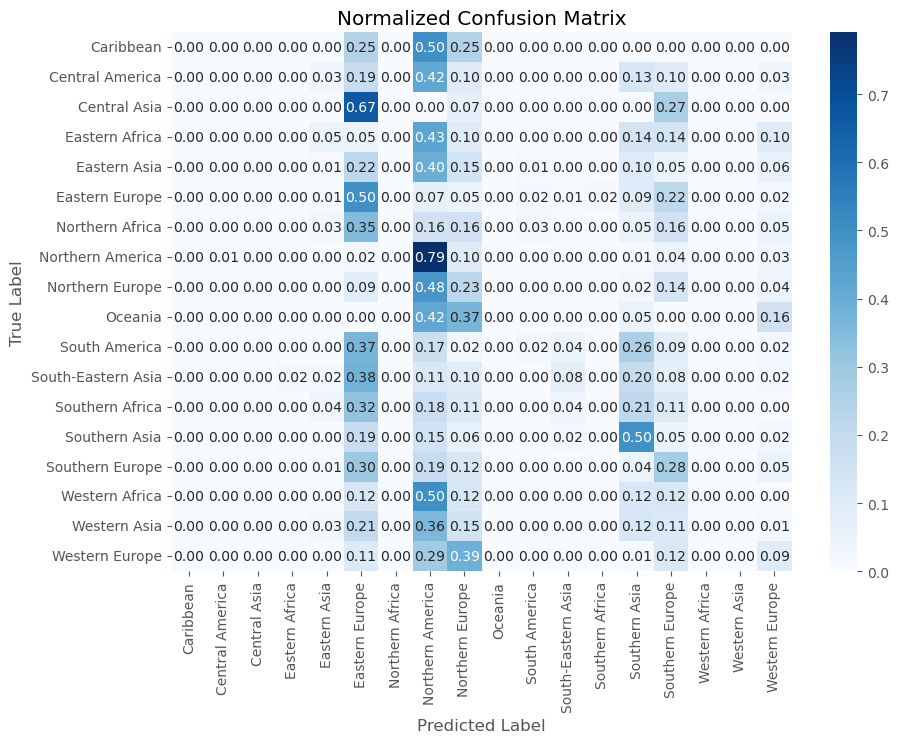

In [108]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=model.classes_, columns=model.classes_)
conf_matrix_df_normalized = conf_matrix_df.div(conf_matrix_df.sum(axis=1), axis=0)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix_df_normalized, annot=True, fmt='.2f', cmap='Blues')
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [109]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
                    precision    recall  f1-score   support

         Caribbean       0.00      0.00      0.00        16
   Central America       0.00      0.00      0.00        31
      Central Asia       0.00      0.00      0.00        15
    Eastern Africa       0.00      0.00      0.00        21
      Eastern Asia       0.10      0.01      0.02        86
    Eastern Europe       0.21      0.50      0.30       128
   Northern Africa       0.00      0.00      0.00        37
  Northern America       0.45      0.79      0.58       339
   Northern Europe       0.22      0.23      0.22       213
           Oceania       0.00      0.00      0.00        19
     South America       0.20      0.02      0.04        46
South-Eastern Asia       0.42      0.08      0.14        61
   Southern Africa       0.00      0.00      0.00        28
     Southern Asia       0.42      0.50      0.45       125
   Southern Europe       0.28      0.28      0.28       182
    Western Afri

c:\Users\yacin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\yacin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\yacin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [110]:
from sklearn.ensemble import RandomForestClassifier
# same but with rnd forest
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}") # better than knn

Accuracy: 0.406371911573472


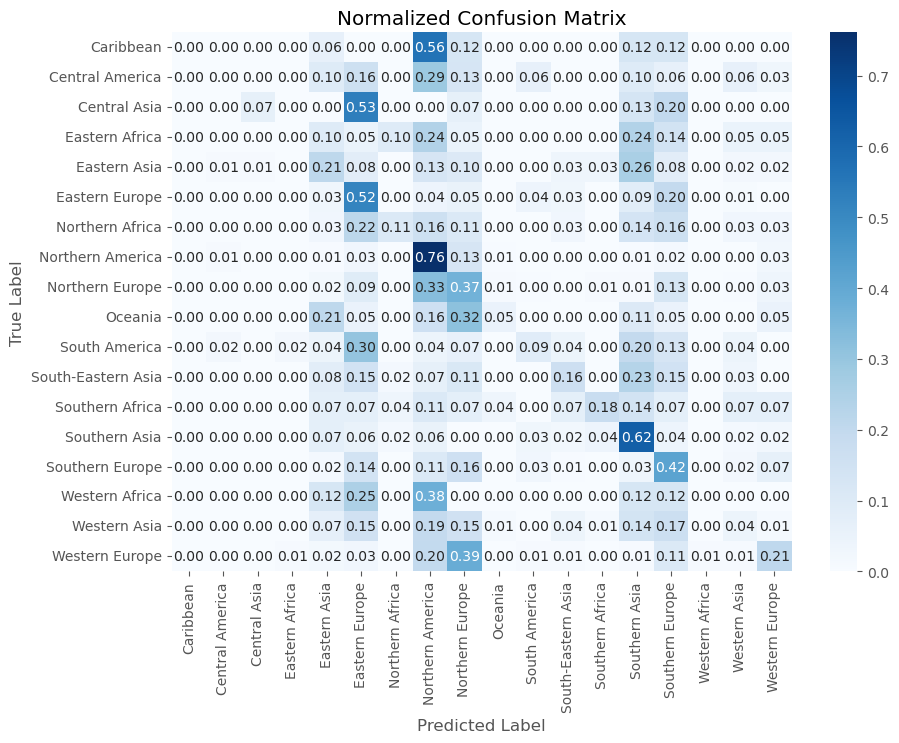

In [111]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=model.classes_, columns=model.classes_)
conf_matrix_df_normalized = conf_matrix_df.div(conf_matrix_df.sum(axis=1), axis=0)

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix_df_normalized, annot=True, fmt='.2f', cmap='Blues')
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [112]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
                    precision    recall  f1-score   support

         Caribbean       0.00      0.00      0.00        16
   Central America       0.00      0.00      0.00        31
      Central Asia       0.33      0.07      0.11        15
    Eastern Africa       0.00      0.00      0.00        21
      Eastern Asia       0.26      0.21      0.23        86
    Eastern Europe       0.33      0.52      0.40       128
   Northern Africa       0.40      0.11      0.17        37
  Northern America       0.57      0.76      0.65       339
   Northern Europe       0.31      0.37      0.34       213
           Oceania       0.14      0.05      0.08        19
     South America       0.18      0.09      0.12        46
South-Eastern Asia       0.33      0.16      0.22        61
   Southern Africa       0.31      0.18      0.23        28
     Southern Asia       0.44      0.62      0.51       125
   Southern Europe       0.37      0.42      0.39       182
    Western Afri

c:\Users\yacin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\yacin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\yacin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Predict the room's Continent based on the hotels features

In [113]:
feature_cols = [ 'Stars','Score','Staff_rating','Distance from center', 'Facilities_rating', 'Cleanliness_rating',
                'Comfort_rating', 'Value_for_money_rating', 'Location_rating', 'Price']

target_col = 'Continent' 
cols = feature_cols + [target_col]
tmp_df = df_full[cols].dropna()
print(tmp_df.shape)
# display(tmp_df.head(20))
# save as excel file
# tmp_df.to_excel('data_tmp.xlsx')

X_train, X_test, y_train, y_test = train_test_split(tmp_df[feature_cols], tmp_df[target_col], test_size=0.2, random_state=42)
model = KNeighborsClassifier(n_neighbors=15, weights='distance', metric='manhattan')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}") 

(155019, 11)
Accuracy: 0.8103470519932912


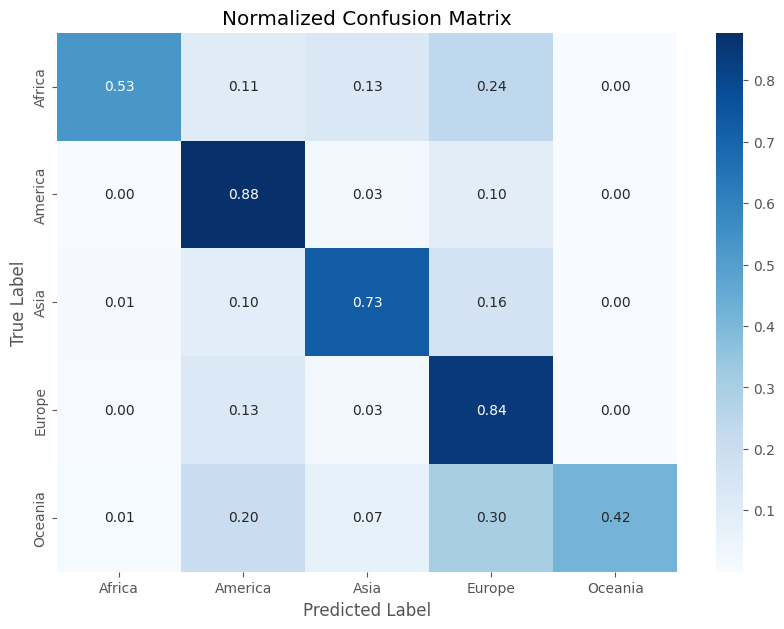

In [59]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=model.classes_, columns=model.classes_)
conf_matrix_df_normalized = conf_matrix_df.div(conf_matrix_df.sum(axis=1), axis=0)

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix_df_normalized, annot=True, fmt='.2f', cmap='Blues')
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [60]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}") 

Accuracy: 0.9961295316733325


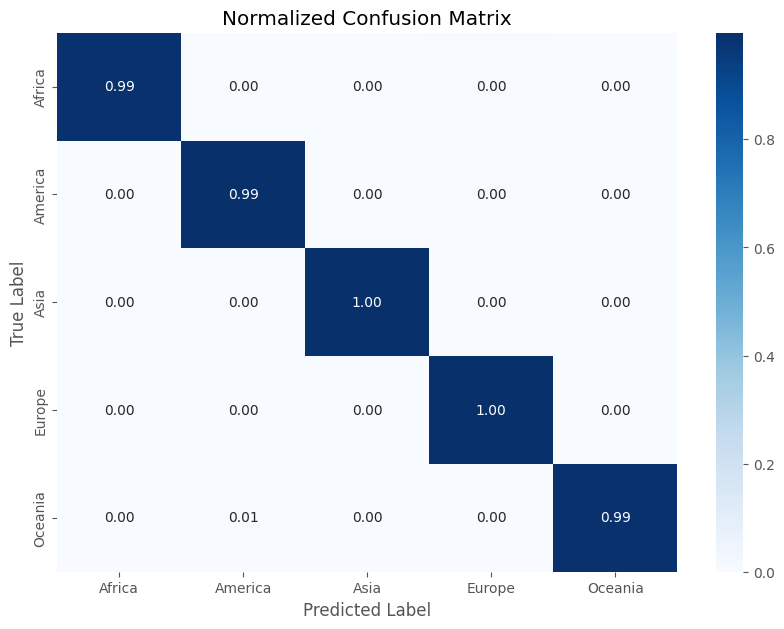

In [61]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=model.classes_, columns=model.classes_)
conf_matrix_df_normalized = conf_matrix_df.div(conf_matrix_df.sum(axis=1), axis=0)

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix_df_normalized, annot=True, fmt='.2f', cmap='Blues')
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Classification region
### Predict the room's Region based on the hotels features

In [66]:
feature_cols = [ 'Stars','Score','Staff_rating','Distance from center', 'Facilities_rating', 'Cleanliness_rating',
                'Comfort_rating', 'Value_for_money_rating', 'Location_rating', 'Price']

target_col = 'Region' # changed this to region instead of continent
cols = feature_cols + [target_col]
tmp_df = df_full[cols].dropna()
# display(tmp_df.tail(20))

X_train, X_test, y_train, y_test = train_test_split(tmp_df[feature_cols], tmp_df[target_col], test_size=0.2, random_state=42)
model = KNeighborsClassifier(n_neighbors=15, weights='distance', metric='manhattan')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6889433621468197


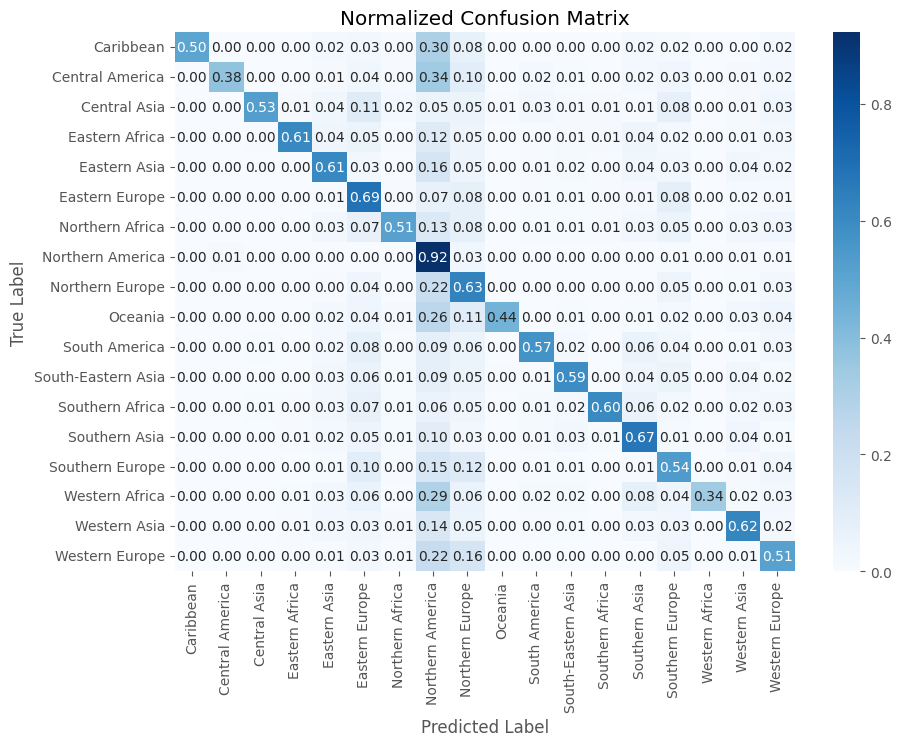

In [67]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=model.classes_, columns=model.classes_)
conf_matrix_df_normalized = conf_matrix_df.div(conf_matrix_df.sum(axis=1), axis=0)

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix_df_normalized, annot=True, fmt='.2f', cmap='Blues')
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [68]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
                    precision    recall  f1-score   support

         Caribbean       0.90      0.50      0.64       253
   Central America       0.57      0.38      0.45       430
      Central Asia       0.76      0.53      0.62       154
    Eastern Africa       0.76      0.61      0.68       276
      Eastern Asia       0.75      0.61      0.67      1554
    Eastern Europe       0.62      0.69      0.65      2590
   Northern Africa       0.77      0.51      0.62       872
  Northern America       0.71      0.92      0.80      9116
   Northern Europe       0.62      0.63      0.63      4582
           Oceania       0.82      0.44      0.57       361
     South America       0.76      0.57      0.65       649
South-Eastern Asia       0.72      0.59      0.65       924
   Southern Africa       0.77      0.60      0.68       409
     Southern Asia       0.75      0.67      0.71      1577
   Southern Europe       0.65      0.54      0.59      3191
    Western Afri

In [69]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.989033673074442


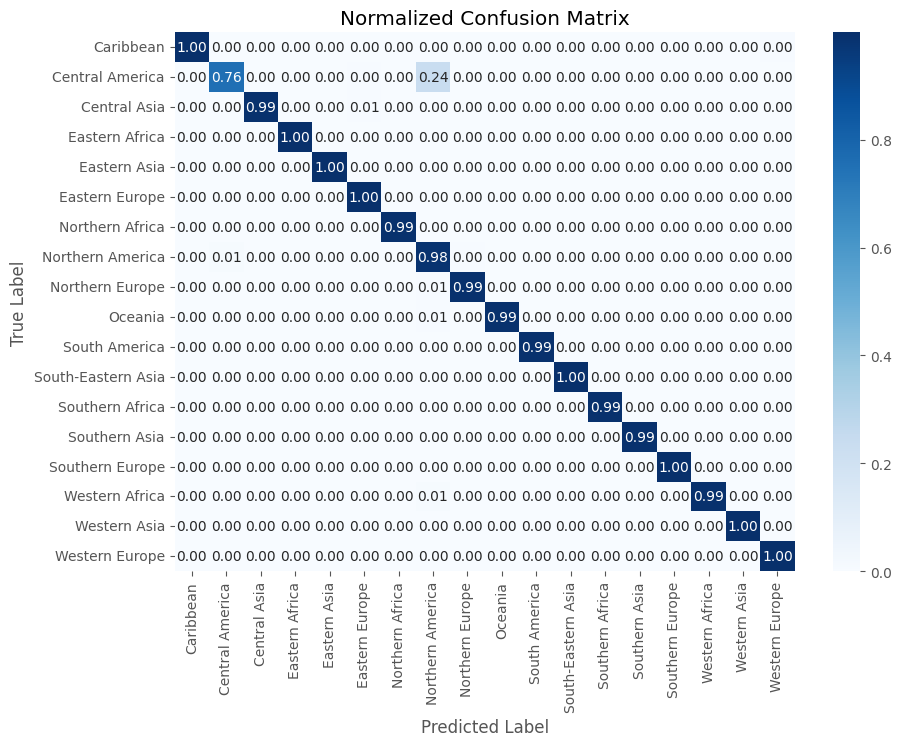

In [70]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=model.classes_, columns=model.classes_)
conf_matrix_df_normalized = conf_matrix_df.div(conf_matrix_df.sum(axis=1), axis=0)

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix_df_normalized, annot=True, fmt='.2f', cmap='Blues')
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [71]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
                    precision    recall  f1-score   support

         Caribbean       1.00      1.00      1.00       253
   Central America       0.76      0.76      0.76       430
      Central Asia       1.00      0.99      1.00       154
    Eastern Africa       1.00      1.00      1.00       276
      Eastern Asia       1.00      1.00      1.00      1554
    Eastern Europe       0.99      1.00      1.00      2590
   Northern Africa       1.00      0.99      1.00       872
  Northern America       0.98      0.98      0.98      9116
   Northern Europe       0.99      0.99      0.99      4582
           Oceania       1.00      0.99      1.00       361
     South America       1.00      0.99      1.00       649
South-Eastern Asia       1.00      1.00      1.00       924
   Southern Africa       1.00      0.99      1.00       409
     Southern Asia       1.00      0.99      1.00      1577
   Southern Europe       1.00      1.00      1.00      3191
    Western Afri

## Classification country
### predict country of hotel based on hotel features

In [129]:
feature_cols = [ 'Stars','Score','Staff_rating','Distance from center', 'Facilities_rating', 'Cleanliness_rating',
                'Comfort_rating', 'Value_for_money_rating', 'Location_rating', 'Price']

target_col = 'Country'
cols = feature_cols + [target_col]
tmp_df = df_full[cols].dropna()
# display(tmp_df.tail(20))

X_train, X_test, y_train, y_test = train_test_split(tmp_df[feature_cols], tmp_df[target_col], test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9884853567281641


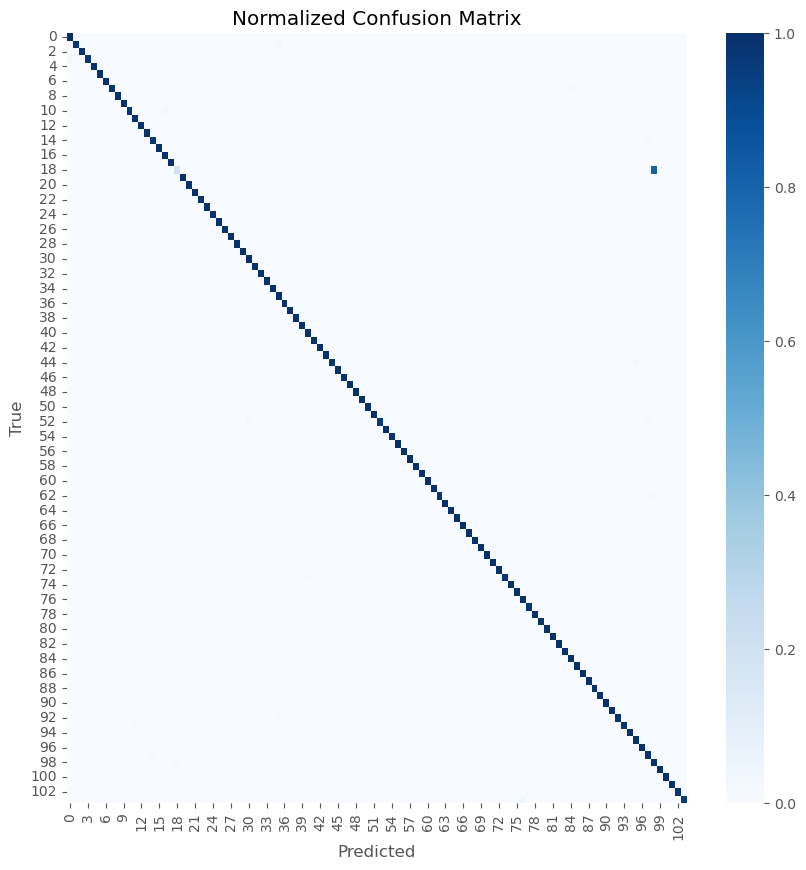

In [130]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix as a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(cm_normalized, annot=False, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.show()

## predict city of hotel based on hotel features

In [127]:
feature_cols = [ 'Stars','Score','Staff_rating','Distance from center', 'Facilities_rating', 'Cleanliness_rating',
                'Comfort_rating', 'Value_for_money_rating', 'Location_rating', 'Price']

target_col = 'City'
cols = feature_cols + [target_col]
tmp_df = df_full[cols].dropna()
# display(tmp_df.tail(20))

X_train, X_test, y_train, y_test = train_test_split(tmp_df[feature_cols], tmp_df[target_col], test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9978067346148884


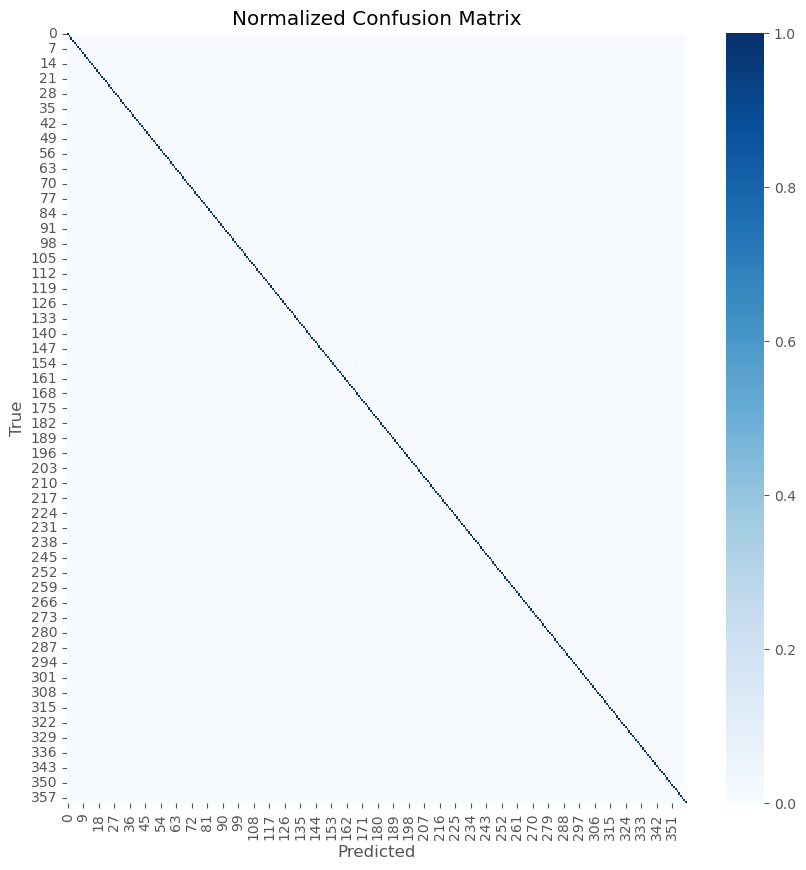

In [128]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix as a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(cm_normalized, annot=False, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.show()